## Telecom Churn - Group Case Study


#### Instructions to run the code

1. Do not alter any file name.
2. Keep the folder structure intact.
3. Keep all the files in folder where python notebook is located.
4. Few verification steps are purposely added. Uncomment them and execute as and when required.</font>

#### Folder Structure <br>
Telecom Churn - Group Case Study #Main Folder <br>

>> telecom_churn_data.csv #Data file

### Import Important libraries

In [1]:
# Import important libraries
import numpy as np
import pandas as pd

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warning libraries
import warnings
warnings.filterwarnings("ignore")

# Setting options
pd.set_option('display.max_columns', None)

# Libraries for data modeling
import sklearn
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Libraries for statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Libraries for PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

%matplotlib inline

# Import libraries
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [2]:
import time
start = time.time()

 ### Read Data

#### Read telecom churn data into 

In [3]:
# read dataframe
telecom = pd.read_csv(r".\telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

#### Review dataframe

In [4]:
# Describe dataframe
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
# Info about dataframe
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [6]:
# Shape of dataframe
telecom.shape

(99999, 226)

In [7]:
# Check columns which have static value
object_var = telecom.nunique() == 1
object_var[object_var== True]

circle_id               True
loc_og_t2o_mou          True
std_og_t2o_mou          True
loc_ic_t2o_mou          True
last_date_of_month_6    True
last_date_of_month_7    True
last_date_of_month_8    True
last_date_of_month_9    True
std_og_t2c_mou_6        True
std_og_t2c_mou_7        True
std_og_t2c_mou_8        True
std_og_t2c_mou_9        True
std_ic_t2o_mou_6        True
std_ic_t2o_mou_7        True
std_ic_t2o_mou_8        True
std_ic_t2o_mou_9        True
dtype: bool

In [8]:
# We will store these values in variables and delete the columns
circle_id_var            = telecom["circle_id"].unique()[0]
loc_og_t2o_mou_var       = telecom["loc_og_t2o_mou"].unique()[0]
std_og_t2o_mou_var       = telecom["std_og_t2o_mou"].unique()[0]
loc_ic_t2o_mou_var       = telecom["loc_ic_t2o_mou"].unique()[0]
last_date_of_month_6_var = telecom["last_date_of_month_6"].unique()[0]   
last_date_of_month_7_var = telecom["last_date_of_month_7"].unique()[0]   
last_date_of_month_8_var = telecom["last_date_of_month_8"].unique()[0]   
last_date_of_month_9_var = telecom["last_date_of_month_9"].unique()[0]   
std_og_t2c_mou_6_var     = telecom["std_og_t2c_mou_6"].unique()[0]
std_og_t2c_mou_7_var     = telecom["std_og_t2c_mou_7"].unique()[0]
std_og_t2c_mou_8_var     = telecom["std_og_t2c_mou_8"].unique()[0]
std_og_t2c_mou_9_var     = telecom["std_og_t2c_mou_9"].unique()[0]
std_ic_t2o_mou_6_var     = telecom["std_ic_t2o_mou_6"].unique()[0]
std_ic_t2o_mou_7_var     = telecom["std_ic_t2o_mou_7"].unique()[0]
std_ic_t2o_mou_8_var     = telecom["std_ic_t2o_mou_8"].unique()[0]
std_ic_t2o_mou_9_var     = telecom["std_ic_t2o_mou_9"].unique()[0]

In [9]:
# Delete static columns from dataframe
cols2del = object_var[object_var== True].index

telecom.drop(cols2del,axis=1,inplace=True)
telecom.shape

(99999, 210)

#### Identify high profile customers

In [10]:
# Review recharge pattern

rechvar = ["total_rech_num_6","total_rech_num_7","total_rech_amt_6","total_rech_amt_7"
           ,"max_rech_amt_6","max_rech_amt_7"]
telecom[rechvar].head()

,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7
0,4,3,362,252,252,252
1,4,9,74,384,44,154
2,5,4,168,315,86,200
3,10,11,230,310,60,50
4,5,6,196,350,56,110


In [11]:
# High profile customers
# More than 70% of average of first 2 months

# Average of 6-7 months
telecom["avgrch_67"] = ((telecom["total_rech_amt_6"] + telecom["total_rech_amt_7"]) / 
(telecom["total_rech_num_6"] + telecom["total_rech_num_7"]))
avr70per = round(telecom["avgrch_67"].quantile(0.70),4)
telecom["highprofile"] = telecom["avgrch_67"].apply(lambda c:1 if c>=avr70per else 0)
telecom.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avgrch_67,highprofile
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,

#### Identify churn customers

In [12]:
# Identify churn customers
telecom[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.00
1,188.04,72.11,0.0,0.00
2,517.74,124.94,0.0,8.42
3,305.38,362.54,0.0,0.00
4,205.31,104.59,0.0,0.00


In [13]:
#  Identify churn customers
# No calls and no data

telecom["churn"] = (telecom[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]]==0).all(axis=1)
telecom["churn"] = telecom["churn"].map({True:1,False:0})
telecom[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9","churn"]].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.0,0.00,1
1,188.04,72.11,0.0,0.00,0
2,517.74,124.94,0.0,8.42,0
3,305.38,362.54,0.0,0.00,0
4,205.31,104.59,0.0,0.00,0


#### Rename columns to make them consistent with naming convention

In [14]:
# Rename columns
# jun_vbc_3g = vbc_3g_6
# jul_vbc_3g = vbc_3g_7
# aug_vbc_3g = vbc_3g_8
# sep_vbc_3g = vbc_3g_9
telecom.rename(columns = {"jun_vbc_3g":"vbc_3g_6", 
                "jul_vbc_3g":"vbc_3g_7", 
                "aug_vbc_3g":"vbc_3g_8", 
                "sep_vbc_3g":"vbc_3g_9", 
               },inplace=True)
telecom.shape

(99999, 213)

#### Remove attributes used for churn phase

In [15]:
cols = list(telecom.columns)
col_9 = [col for col in cols if col.endswith("_9")]
telecom.drop(col_9,axis=1,inplace=True)
telecom.shape

(99999, 161)

#### Create high profile customer data

In [16]:
telecom_high = telecom[telecom["highprofile"]==1]
telecom_high.shape

(29944, 161)

Since our focus is on high profile customers only, we will usue telecom_high for analysis

#### Churn rate in high profile customers

In [17]:
telecom_high.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,avgrch_67,highprofile,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,87.714286,1,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,237.000000,1,1
9,7001864400,119.518,247.435,170.231,33.89,30.11,22.43

In [18]:
churn = round(100*(len(telecom[telecom["churn"]==1])/len(telecom.index)),4)
hchurn = round(100*(len(telecom_high[telecom_high["churn"]==1])/len(telecom_high.index)),4)

print("Churn on all customers: ", churn)
print("Churn on high profile customers: ", hchurn)

Churn on all customers:  10.1911
Churn on high profile customers:  8.6896


### Missing value analysis and treatment

#### Check missing value in data

In [19]:
# Check missing value in data
round(100*(telecom_high.loc[:,telecom_high.isnull().any()].isnull().sum()/len(telecom_high.index)),2).sort_values(ascending=False)

total_rech_data_7           66.21
fb_user_7                   66.21
night_pck_user_7            66.21
count_rech_2g_7             66.21
arpu_2g_7                   66.21
count_rech_3g_7             66.21
date_of_last_rech_data_7    66.21
arpu_3g_7                   66.21
max_rech_data_7             66.21
av_rech_amt_data_7          66.21
av_rech_amt_data_6          66.03
count_rech_2g_6             66.03
count_rech_3g_6             66.03
total_rech_data_6           66.03
arpu_3g_6                   66.03
arpu_2g_6                   66.03
date_of_last_rech_data_6    66.03
night_pck_user_6            66.03
fb_user_6                   66.03
max_rech_data_6             66.03
date_of_last_rech_data_8    65.51
total_rech_data_8           65.51
fb_user_8                   65.51
max_rech_data_8             65.51
night_pck_user_8            65.51
count_rech_3g_8             65.51
av_rech_amt_data_8          65.51
arpu_3g_8                   65.51
arpu_2g_8                   65.51
count_rech_2g_

In [20]:
# Analyze Missing value for recharge (Month 6)

rch = ["av_rech_amt_data_6","total_rech_data_6","date_of_last_rech_data_6","max_rech_data_6","count_rech_2g_6",
      "count_rech_3g_6","vol_2g_mb_6","vol_3g_mb_6","arpu_3g_6","arpu_2g_6","monthly_2g_6","sachet_2g_6",
      "monthly_3g_6","sachet_3g_6"]

t1 = telecom_high[rch]
t1[t1["total_rech_data_6"].isnull()].head()

,av_rech_amt_data_6,total_rech_data_6,date_of_last_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6
7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0
9,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0
13,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0
16,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0
20,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0


#### Conclusion - <br>
If the total recharge data is null then all recharge related fields can be imputed as 0

#### Imputing values for recharge related data

Imputing values for month = 6

In [21]:
# Impute total_rech_data_6
telecom_high.loc[pd.isnull(telecom_high["total_rech_data_6"]),"total_rech_data_6"] = 0

# Check to ensure there are no values
impdata6 = ["av_rech_amt_data_6","max_rech_data_6","count_rech_2g_6",
      "count_rech_3g_6","vol_2g_mb_6","vol_3g_mb_6","arpu_3g_6","arpu_2g_6","monthly_2g_6","sachet_2g_6",
      "monthly_3g_6","sachet_3g_6"]

impdate6 = "date_of_last_rech_data_6"
# Ensure that are no values for columns when total recharge is 0
for col in impdata6:
    print(col," = ", len(telecom_high[(telecom_high["total_rech_data_6"]==0) & (telecom_high[col] > 0)]))
    
mindate = pd.to_datetime(telecom_high[impdate6],format="%m/%d/%Y").min()
print(impdate6," = ", len(telecom_high[(telecom_high["total_rech_data_6"]==0) & (pd.to_datetime(telecom_high[impdate6]) > mindate)]))

av_rech_amt_data_6  =  0
max_rech_data_6  =  0
count_rech_2g_6  =  0
count_rech_3g_6  =  0
vol_2g_mb_6  =  0
vol_3g_mb_6  =  0
arpu_3g_6  =  0
arpu_2g_6  =  0
monthly_2g_6  =  0
sachet_2g_6  =  0
monthly_3g_6  =  0
sachet_3g_6  =  0
date_of_last_rech_data_6  =  0


In [22]:
#Imputing values to 0
telecom_high.loc[telecom_high["total_rech_data_6"]==0,impdata6] = 0
telecom_high.loc[telecom_high["total_rech_data_6"]==0,impdate6] = 0

Imputing values for month = 7

In [23]:
# Impute total_rech_data_7
telecom_high.loc[pd.isnull(telecom_high["total_rech_data_7"]),"total_rech_data_7"] = 0

# Check to ensure there are no values
impdata7 = ["av_rech_amt_data_7","max_rech_data_7","count_rech_2g_7",
      "count_rech_3g_7","vol_2g_mb_7","vol_3g_mb_7","arpu_3g_7","arpu_2g_7","monthly_2g_7","sachet_2g_7",
      "monthly_3g_7","sachet_3g_7"]

impdate7 = "date_of_last_rech_data_7"
# Ensure that are no values for columns when total recharge is 0
for col in impdata7:
    print(col," = ", len(telecom_high[(telecom_high["total_rech_data_7"]==0) & (telecom_high[col] > 0)]))
    
mindate = pd.to_datetime(telecom_high[impdate7],format="%m/%d/%Y").min()
print(impdate7," = ", len(telecom_high[(telecom_high["total_rech_data_7"]==0) & (pd.to_datetime(telecom_high[impdate7]) > mindate)]))

av_rech_amt_data_7  =  0
max_rech_data_7  =  0
count_rech_2g_7  =  0
count_rech_3g_7  =  0
vol_2g_mb_7  =  0
vol_3g_mb_7  =  0
arpu_3g_7  =  0
arpu_2g_7  =  0
monthly_2g_7  =  0
sachet_2g_7  =  0
monthly_3g_7  =  0
sachet_3g_7  =  0
date_of_last_rech_data_7  =  0


In [24]:
#Imputing values to 0
telecom_high.loc[telecom_high["total_rech_data_7"]==0,impdata7] = 0
telecom_high.loc[telecom_high["total_rech_data_7"]==0,impdate7] = 0

Imputing values for month = 8

In [25]:
# Impute total_rech_data_8
telecom_high.loc[pd.isnull(telecom_high["total_rech_data_8"]),"total_rech_data_8"] = 0

# Check to ensure there are no values
impdata8 = ["av_rech_amt_data_8","max_rech_data_8","count_rech_2g_8",
      "count_rech_3g_8","vol_2g_mb_8","vol_3g_mb_8","arpu_3g_8","arpu_2g_8","monthly_2g_8","sachet_2g_8",
      "monthly_3g_8","sachet_3g_8"]

impdate8 = "date_of_last_rech_data_8"
# Ensure that are no values for columns when total recharge is 0
for col in impdata8:
    print(col," = ", len(telecom_high[(telecom_high["total_rech_data_8"]==0) & (telecom_high[col] > 0)]))
    
mindate = pd.to_datetime(telecom_high[impdate8],format="%m/%d/%Y").min()
print(impdate8," = ", len(telecom_high[(telecom_high["total_rech_data_8"]==0) & (pd.to_datetime(telecom_high[impdate8]) > mindate)]))

av_rech_amt_data_8  =  0
max_rech_data_8  =  0
count_rech_2g_8  =  0
count_rech_3g_8  =  0
vol_2g_mb_8  =  0
vol_3g_mb_8  =  0
arpu_3g_8  =  0
arpu_2g_8  =  0
monthly_2g_8  =  0
sachet_2g_8  =  0
monthly_3g_8  =  0
sachet_3g_8  =  0
date_of_last_rech_data_8  =  0


In [26]:
#Imputing values to 0
telecom_high.loc[telecom_high["total_rech_data_8"]==0,impdata8] = 0
telecom_high.loc[telecom_high["total_rech_data_8"]==0,impdate8] = 0

In [27]:
# Check missing value in data
round(100*(telecom_high.loc[:,telecom_high.isnull().any()].isnull().sum()/len(telecom_high.index)),2).sort_values(ascending=False)

night_pck_user_7       66.21
fb_user_7              66.21
fb_user_6              66.03
night_pck_user_6       66.03
fb_user_8              65.51
night_pck_user_8       65.51
std_og_t2t_mou_8        5.12
loc_ic_t2f_mou_8        5.12
loc_ic_t2m_mou_8        5.12
loc_ic_t2t_mou_8        5.12
og_others_8             5.12
isd_og_mou_8            5.12
std_og_mou_8            5.12
std_og_t2f_mou_8        5.12
std_og_t2m_mou_8        5.12
loc_og_t2c_mou_8        5.12
loc_og_mou_8            5.12
std_ic_t2t_mou_8        5.12
loc_og_t2f_mou_8        5.12
loc_og_t2m_mou_8        5.12
loc_og_t2t_mou_8        5.12
roam_og_mou_8           5.12
roam_ic_mou_8           5.12
offnet_mou_8            5.12
onnet_mou_8             5.12
loc_ic_mou_8            5.12
spl_og_mou_8            5.12
std_ic_t2m_mou_8        5.12
ic_others_8             5.12
spl_ic_mou_8            5.12
                       ...  
loc_ic_t2m_mou_6        3.30
loc_ic_mou_7            3.12
roam_ic_mou_7           3.12
offnet_mou_7  

#### Imputing values for fbuser related data

In [28]:
# Analyze Missing value for fbuser (Month 6)
fb = ["total_rech_data_6","fb_user_6","night_pck_user_6"]
t1 = telecom_high[fb]
t1[((t1["fb_user_6"].isnull()) & (t1["total_rech_data_6"]>0)) |
   ((t1["fb_user_6"].isnull()) & (t1["night_pck_user_6"]>0))]

,total_rech_data_6,fb_user_6,night_pck_user_6


#### Conclusion - <br>
If the total recharge data is null then fb_user fields can be imputed as 0

In [29]:
# Check values for fbuser related fields
fbuser = ["total_rech_data_6","total_rech_data_7","total_rech_data_8",
          "fb_user_6","fb_user_7","fb_user_8"]
telecom_high.loc[telecom_high["total_rech_data_8"]==0,fbuser].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,fb_user_6,fb_user_7,fb_user_8
7,0.0,0.0,0.0,NaN,NaN,NaN
9,0.0,1.0,0.0,NaN,1.0,NaN
16,0.0,0.0,0.0,NaN,NaN,NaN
20,0.0,0.0,0.0,NaN,NaN,NaN
22,0.0,0.0,0.0,NaN,NaN,NaN


In [30]:
# Impute values for fbuser related fields
telecom_high.loc[telecom_high["total_rech_data_6"]==0,"fb_user_6"] = 0
telecom_high.loc[telecom_high["total_rech_data_7"]==0,"fb_user_7"] = 0
telecom_high.loc[telecom_high["total_rech_data_8"]==0,"fb_user_8"] = 0

#### Imputing values for night user related fields

In [31]:
# Imputing values for night user related fields
ngtuser = ["total_rech_data_6","total_rech_data_7","total_rech_data_8",
           "night_pck_user_6","night_pck_user_7","night_pck_user_8"]
telecom_high.loc[telecom_high["total_rech_data_8"]==0,ngtuser].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,night_pck_user_6,night_pck_user_7,night_pck_user_8
7,0.0,0.0,0.0,NaN,NaN,NaN
9,0.0,1.0,0.0,NaN,0.0,NaN
16,0.0,0.0,0.0,NaN,NaN,NaN
20,0.0,0.0,0.0,NaN,NaN,NaN
22,0.0,0.0,0.0,NaN,NaN,NaN


In [32]:
# Impute values for fbuser related fields
telecom_high.loc[telecom_high["total_rech_data_6"]==0,"night_pck_user_6"] = 0
telecom_high.loc[telecom_high["total_rech_data_7"]==0,"night_pck_user_7"] = 0
telecom_high.loc[telecom_high["total_rech_data_8"]==0,"night_pck_user_8"] = 0

In [33]:
# Check missing value in data
round(100*(telecom_high.loc[:,telecom_high.isnull().any()].isnull().sum()/len(telecom_high.index)),2).sort_values(ascending=False)

isd_og_mou_8           5.12
loc_og_mou_8           5.12
loc_ic_t2t_mou_8       5.12
loc_ic_mou_8           5.12
og_others_8            5.12
spl_og_mou_8           5.12
std_ic_t2t_mou_8       5.12
std_og_mou_8           5.12
std_og_t2f_mou_8       5.12
std_ic_t2m_mou_8       5.12
std_og_t2m_mou_8       5.12
std_og_t2t_mou_8       5.12
std_ic_t2f_mou_8       5.12
loc_og_t2c_mou_8       5.12
loc_ic_t2f_mou_8       5.12
std_ic_mou_8           5.12
loc_og_t2f_mou_8       5.12
loc_og_t2m_mou_8       5.12
spl_ic_mou_8           5.12
loc_og_t2t_mou_8       5.12
roam_og_mou_8          5.12
isd_ic_mou_8           5.12
roam_ic_mou_8          5.12
offnet_mou_8           5.12
ic_others_8            5.12
onnet_mou_8            5.12
loc_ic_t2m_mou_8       5.12
date_of_last_rech_8    4.56
std_og_t2t_mou_6       3.30
std_og_mou_6           3.30
                       ... 
std_ic_t2m_mou_6       3.30
offnet_mou_7           3.12
ic_others_7            3.12
loc_ic_t2m_mou_7       3.12
roam_ic_mou_7       

#### Imputing values for outgoing related fields

In [34]:
# Analyze outgoing calls
ogcall = ["std_og_t2m_mou_8","std_og_t2t_mou_8","loc_og_mou_8","isd_og_mou_8","spl_og_mou_8","og_others_8"]

# Ensure that are no values for columns when total recharge is 0
for col in ogcall:
    print(col," = ", len(telecom_high[(telecom_high["total_og_mou_8"]==0) & (telecom_high[col] > 0)]))

std_og_t2m_mou_8  =  0
std_og_t2t_mou_8  =  0
loc_og_mou_8  =  0
isd_og_mou_8  =  0
spl_og_mou_8  =  0
og_others_8  =  0


In [35]:
# Create a list of columns for outgoing
colsmou = list(telecom_high.columns)
og6 = [col for col  in colsmou if ("_og_" in col) & (col.endswith("_6"))]
og7 = [col for col  in colsmou if ("_og_" in col) & (col.endswith("_7"))]
og8 = [col for col  in colsmou if ("_og_" in col) & (col.endswith("_8"))]

In [36]:
# Ensure that are no values for columns when total recharge is 0 - month 6
for col in og6:
    print(col," = ", len(telecom_high[(telecom_high["total_og_mou_6"]==0) & (telecom_high[col] > 0)]))

roam_og_mou_6  =  578
loc_og_t2t_mou_6  =  0
loc_og_t2m_mou_6  =  0
loc_og_t2f_mou_6  =  0
loc_og_t2c_mou_6  =  51
loc_og_mou_6  =  0
std_og_t2t_mou_6  =  0
std_og_t2m_mou_6  =  0
std_og_t2f_mou_6  =  0
std_og_mou_6  =  0
isd_og_mou_6  =  0
spl_og_mou_6  =  0
total_og_mou_6  =  0


In [37]:
# Ensure that are no values for columns when total recharge is 0 - month 7
for col in og7:
    print(col," = ", len(telecom_high[(telecom_high["total_og_mou_7"]==0) & (telecom_high[col] > 0)]))

roam_og_mou_7  =  619
loc_og_t2t_mou_7  =  0
loc_og_t2m_mou_7  =  0
loc_og_t2f_mou_7  =  0
loc_og_t2c_mou_7  =  71
loc_og_mou_7  =  0
std_og_t2t_mou_7  =  0
std_og_t2m_mou_7  =  0
std_og_t2f_mou_7  =  0
std_og_mou_7  =  0
isd_og_mou_7  =  0
spl_og_mou_7  =  0
total_og_mou_7  =  0


In [38]:
# Ensure that are no values for columns when total recharge is 0 - month 8
for col in og8:
    print(col," = ", len(telecom_high[(telecom_high["total_og_mou_8"]==0) & (telecom_high[col] > 0)]))

roam_og_mou_8  =  845
loc_og_t2t_mou_8  =  0
loc_og_t2m_mou_8  =  0
loc_og_t2f_mou_8  =  0
loc_og_t2c_mou_8  =  93
loc_og_mou_8  =  0
std_og_t2t_mou_8  =  0
std_og_t2m_mou_8  =  0
std_og_t2f_mou_8  =  0
std_og_mou_8  =  0
isd_og_mou_8  =  0
spl_og_mou_8  =  0
total_og_mou_8  =  0


#### Conclusion - <br>
If the total outgoing minutes is 0 then below fields can be imputed as 0
1. loc_og_t2t_mou_*
2. loc_og_t2m_mou_*
3. loc_og_t2f_mou_*
4. loc_og_mou_*
5. std_og_t2t_mou_*
6. std_og_t2m_mou_*
7. std_og_t2f_mou_*
8. std_og_mou_*
9. isd_og_mou_*
10. spl_og_mou_*
11. total_og_mou_*

In [39]:
# newlist for imputing - month6
rmv6 = ["roam_og_mou_6","loc_og_t2c_mou_6"]
o6 = [col for col in og6 if col not in rmv6]

# newlist for imputing - month7
rmv7 = ["roam_og_mou_7","loc_og_t2c_mou_7"]
o7 = [col for col in og7 if col not in rmv7]

# newlist for imputing - month8
rmv8 = ["roam_og_mou_8","loc_og_t2c_mou_8"]
o8 = [col for col in og8 if col not in rmv8]

len(o6),len(o7),len(o8)

(11, 11, 11)

In [40]:
# Impute values to 0 
telecom_high.loc[telecom_high["total_og_mou_6"]==0,o6] = 0
telecom_high.loc[telecom_high["total_og_mou_7"]==0,o7] = 0
telecom_high.loc[telecom_high["total_og_mou_8"]==0,o8] = 0

In [41]:
# Analysing and imputing other outgoing related fields
roamcols = rmv6 + rmv7 + rmv8
for col in roamcols:
    telecom_high.loc[pd.isnull(telecom_high[col]),col] = 0

In [42]:
# Check missing value in data
round(100*(telecom_high.loc[:,telecom_high.isnull().any()].isnull().sum()/len(telecom_high.index)),2).sort_values(ascending=False)

loc_ic_mou_8           5.12
std_ic_t2f_mou_8       5.12
onnet_mou_8            5.12
ic_others_8            5.12
offnet_mou_8           5.12
roam_ic_mou_8          5.12
isd_ic_mou_8           5.12
og_others_8            5.12
loc_ic_t2t_mou_8       5.12
spl_ic_mou_8           5.12
loc_ic_t2m_mou_8       5.12
loc_ic_t2f_mou_8       5.12
std_ic_mou_8           5.12
std_ic_t2t_mou_8       5.12
std_ic_t2m_mou_8       5.12
date_of_last_rech_8    4.56
loc_ic_t2m_mou_6       3.30
spl_ic_mou_6           3.30
offnet_mou_6           3.30
roam_ic_mou_6          3.30
ic_others_6            3.30
og_others_6            3.30
loc_ic_t2t_mou_6       3.30
isd_ic_mou_6           3.30
std_ic_t2f_mou_6       3.30
loc_ic_t2f_mou_6       3.30
onnet_mou_6            3.30
loc_ic_mou_6           3.30
std_ic_mou_6           3.30
std_ic_t2t_mou_6       3.30
std_ic_t2m_mou_6       3.30
std_ic_mou_7           3.12
onnet_mou_7            3.12
offnet_mou_7           3.12
ic_others_7            3.12
std_ic_t2m_mou_7    

#### Imputing values for incoming related fields

In [43]:
# Analyze incoming calls
iccall = ["std_ic_t2m_mou_8","std_ic_t2t_mou_8","loc_ic_mou_8","isd_ic_mou_8","spl_ic_mou_8","ic_others_8"]

# Ensure that are no values for columns when total recharge is 0
for col in iccall:
    print(col," = ", len(telecom_high[(telecom_high["total_ic_mou_8"]==0) & (telecom_high[col] > 0)]))

std_ic_t2m_mou_8  =  0
std_ic_t2t_mou_8  =  0
loc_ic_mou_8  =  0
isd_ic_mou_8  =  0
spl_ic_mou_8  =  0
ic_others_8  =  0


In [44]:
# Create a list of columns for incoming
colsmou = list(telecom_high.columns)
ic6 = [col for col  in colsmou if ("_ic_" in col) & (col.endswith("_6"))]
ic7 = [col for col  in colsmou if ("_ic_" in col) & (col.endswith("_7"))]
ic8 = [col for col  in colsmou if ("_ic_" in col) & (col.endswith("_8"))]

In [45]:
# Ensure that are no values for columns when total recharge is 0 - month 6
for col in ic6:
    print(col," = ", len(telecom_high[(telecom_high["total_ic_mou_6"]==0) & (telecom_high[col] > 0)]))

roam_ic_mou_6  =  561
loc_ic_t2t_mou_6  =  0
loc_ic_t2m_mou_6  =  0
loc_ic_t2f_mou_6  =  0
loc_ic_mou_6  =  0
std_ic_t2t_mou_6  =  0
std_ic_t2m_mou_6  =  0
std_ic_t2f_mou_6  =  0
std_ic_mou_6  =  0
total_ic_mou_6  =  0
spl_ic_mou_6  =  0
isd_ic_mou_6  =  0


In [46]:
# Ensure that are no values for columns when total recharge is 0 - month 7
for col in ic7:
    print(col," = ", len(telecom_high[(telecom_high["total_ic_mou_7"]==0) & (telecom_high[col] > 0)]))

roam_ic_mou_7  =  606
loc_ic_t2t_mou_7  =  0
loc_ic_t2m_mou_7  =  0
loc_ic_t2f_mou_7  =  0
loc_ic_mou_7  =  0
std_ic_t2t_mou_7  =  0
std_ic_t2m_mou_7  =  0
std_ic_t2f_mou_7  =  0
std_ic_mou_7  =  0
total_ic_mou_7  =  0
spl_ic_mou_7  =  0
isd_ic_mou_7  =  0


In [47]:
# Ensure that are no values for columns when total recharge is 0 - month 8
for col in ic8:
    print(col," = ", len(telecom_high[(telecom_high["total_ic_mou_8"]==0) & (telecom_high[col] > 0)]))

roam_ic_mou_8  =  840
loc_ic_t2t_mou_8  =  0
loc_ic_t2m_mou_8  =  0
loc_ic_t2f_mou_8  =  0
loc_ic_mou_8  =  0
std_ic_t2t_mou_8  =  0
std_ic_t2m_mou_8  =  0
std_ic_t2f_mou_8  =  0
std_ic_mou_8  =  0
total_ic_mou_8  =  0
spl_ic_mou_8  =  0
isd_ic_mou_8  =  0


#### Conclusion - <br>
If the total incoming minutes is 0 then below fields can be imputed as 0
1. loc_ic_t2t_mou_*
2. loc_ic_t2m_mou_*
3. loc_ic_t2f_mou_*
4. loc_ic_mou_*
5. std_ic_t2t_mou_*
6. std_ic_t2m_mou_*
7. std_ic_t2f_mou_*
8. std_ic_mou_*
9. total_ic_mou_*
10. spl_ic_mou_*
11. isd_ic_mou_*

In [48]:
# newlist for imputing - month6
rmv6 = ["roam_ic_mou_6"]
i6 = [col for col in ic6 if col not in rmv6]

# newlist for imputing - month7
rmv7 = ["roam_ic_mou_7"]
i7 = [col for col in ic7 if col not in rmv7]

# newlist for imputing - month8
rmv8 = ["roam_ic_mou_8"]
i8 = [col for col in ic8 if col not in rmv8]

len(i6),len(i7),len(i8)

(11, 11, 11)

In [49]:
# Impute values to 0 
telecom_high.loc[telecom_high["total_ic_mou_6"]==0,i6] = 0
telecom_high.loc[telecom_high["total_ic_mou_7"]==0,i7] = 0
telecom_high.loc[telecom_high["total_ic_mou_8"]==0,i8] = 0

In [50]:
# Analysing other incoming related fields
roamcols = rmv6 + rmv7 + rmv8
for col in roamcols:
    telecom_high.loc[pd.isnull(telecom_high[col]),col] = 0

In [51]:
# Check missing value in data
round(100*(telecom_high.loc[:,telecom_high.isnull().any()].isnull().sum()/len(telecom_high.index)),2).sort_values(ascending=False)

ic_others_8            5.12
og_others_8            5.12
offnet_mou_8           5.12
onnet_mou_8            5.12
date_of_last_rech_8    4.56
ic_others_6            3.30
og_others_6            3.30
offnet_mou_6           3.30
onnet_mou_6            3.30
ic_others_7            3.12
og_others_7            3.12
offnet_mou_7           3.12
onnet_mou_7            3.12
date_of_last_rech_7    2.09
date_of_last_rech_6    1.29
dtype: float64

#### Impute other pending columns to 0

In [52]:
# Check missing value in data
colsnull = list(telecom_high.loc[:,telecom_high.isnull().any()].isnull().any().index)
for col in colsnull:
    telecom_high.loc[pd.isnull(telecom_high[col]),col] = 0 

In [53]:
# Check missing value in data
round(100*(telecom_high.loc[:,telecom_high.isnull().any()].isnull().sum()/len(telecom_high.index)),2).sort_values(ascending=False)

Series([], dtype: float64)

### Feature Engineering

In [54]:
# Calcualte days recharged before last date - Month 6
due6 = pd.to_datetime(last_date_of_month_6_var) 
telecom_high["rch_before_due6"] = telecom_high["date_of_last_rech_data_6"].apply(lambda c: due6-pd.to_datetime(c) if c!=0 else pd.NaT)
telecom_high["rch_before_due6"] = telecom_high["rch_before_due6"].dt.days
telecom_high.loc[pd.isnull(telecom_high["rch_before_due6"]),"rch_before_due6"] = 0
telecom_high["rch_before_due6"].astype("int32").head()

0     9
7     0
9     0
13    0
16    0
Name: rch_before_due6, dtype: int32

In [55]:
# Calcualte days recharged before last date - Month 7
due7 = pd.to_datetime(last_date_of_month_7_var) 
telecom_high["rch_before_due7"] = telecom_high["date_of_last_rech_data_7"].apply(lambda c: due7-pd.to_datetime(c) if c!=0 else pd.NaT)
telecom_high["rch_before_due7"] = telecom_high["rch_before_due7"].dt.days
telecom_high.loc[pd.isnull(telecom_high["rch_before_due7"]),"rch_before_due7"] = 0
telecom_high["rch_before_due7"].astype("int32").head()

0     15
7      0
9      8
13     0
16     0
Name: rch_before_due7, dtype: int32

In [56]:
# Calcualte days recharged before last date - Month 8
due8 = pd.to_datetime(last_date_of_month_8_var) 
telecom_high["rch_before_due8"] = telecom_high["date_of_last_rech_data_8"].apply(lambda c: due8-pd.to_datetime(c) if c!=0 else pd.NaT)
telecom_high["rch_before_due8"] = telecom_high["rch_before_due8"].dt.days
telecom_high.loc[pd.isnull(telecom_high["rch_before_due8"]),"rch_before_due8"] = 0
telecom_high["rch_before_due8"].astype("int32").head()

0     23
7      0
9      0
13     1
16     0
Name: rch_before_due8, dtype: int32

In [57]:
# Drop column "highprofile" since dataframe has only highprofile customres
telecom_high.drop("highprofile",axis=1,inplace=True)

In [58]:
dataprep = time.time()
print("Total Time: {} second".format(dataprep-start))
print("Total TIme: {} minutes".format((dataprep-start)/60))

Total Time: 59.55646061897278 second
Total TIme: 0.9926076769828797 minutes


### Data Analysis

In [59]:
# Determine numeric and non-numeric columns
numcols = list((telecom_high.select_dtypes(exclude="object")).columns)
nonnumcols = list((telecom_high.select_dtypes(include="object")).columns)

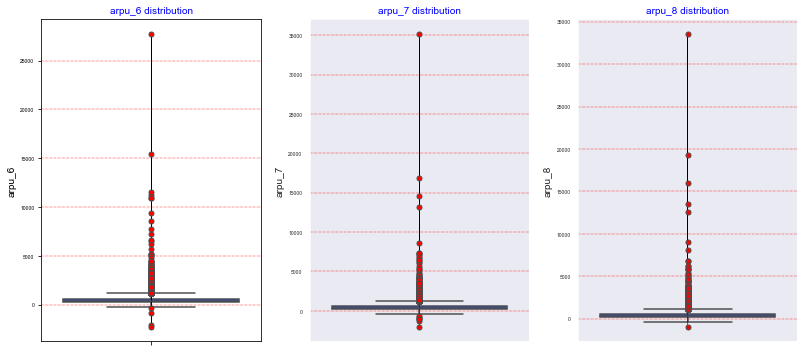

In [60]:
# Check outliers in "arpu_*"
arpucols = ["arpu_6","arpu_7","arpu_8"]

ln=len(arpucols)

n=4
m=(ln//n)+1
ct=1

plt.figure(1,figsize=(15,5))

for col in arpucols:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    flierprops = dict(marker='o',markerfacecolor='red', markersize=5,linewidth=0.5,
                linestyle='-')
    
    sns.boxplot(y=telecom_high[col],palette="bright",flierprops=flierprops)
    title = col + " distribution"
    plt.title(title,color="b",fontsize=10)
    plt.yticks(fontsize=5)
    plt.xticks(fontsize=5,rotation=90)
    ct+=1
    
# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [61]:
# Make a copy
telecom_high2 = telecom_high.copy()

In [62]:
# Remove outlier from arpu
# Removing all outliers is resulting in significant loss of data
outlier_list = ["arpu_6", "arpu_7", "arpu_8"]

print("Shape before removing outlier: ", telecom_high2.shape)

## Remove Outliers from housing data
np.warnings.filterwarnings('ignore')

# Calculate Inter Quantile Region (75th Percentile - 25th Percentile)
# Upper cutoff = 75th percentile + 1.5 * (IQR)
# Lower cutoff = 25th percentile - 1.5 * (IQR)

def removeoutlier(telecom_high2,col):

    col_q1,col_q3,_col_IQR,lower_cutoff,upper_cutoff = 0,0,0,0,0
    data=pd.DataFrame()
    outlier_data=pd.DataFrame()
    data=telecom_high2[col]

    col_q1 = data.quantile(q=.25)
    col_q3 = data.quantile(q=.75)
    col_IQR = col_q3 - col_q1
    lower_cutoff = col_q1 - (1.5 * col_IQR)
    upper_cutoff = col_q3 + (1.5 * col_IQR)

    mask1 = (telecom_high2[col] > lower_cutoff) & (telecom_high2[col] < upper_cutoff)
    mask2 = (telecom_high2[col].isnull()==True)
    if(lower_cutoff==0) | (upper_cutoff==0) | (lower_cutoff == upper_cutoff):
        return telecom_high2
        pass
    else:
        telecom_high2 = telecom_high2[mask1 | mask2]
        return telecom_high2

## Running in loop to remove all outliers
for column in outlier_list:
    telecom_high2 = removeoutlier(telecom_high2,column)

np.warnings.filterwarnings('default')

print("Shape after removing outlier: ", telecom_high2.shape)

Shape before removing outlier:  (29944, 163)
Shape after removing outlier:  (26583, 163)


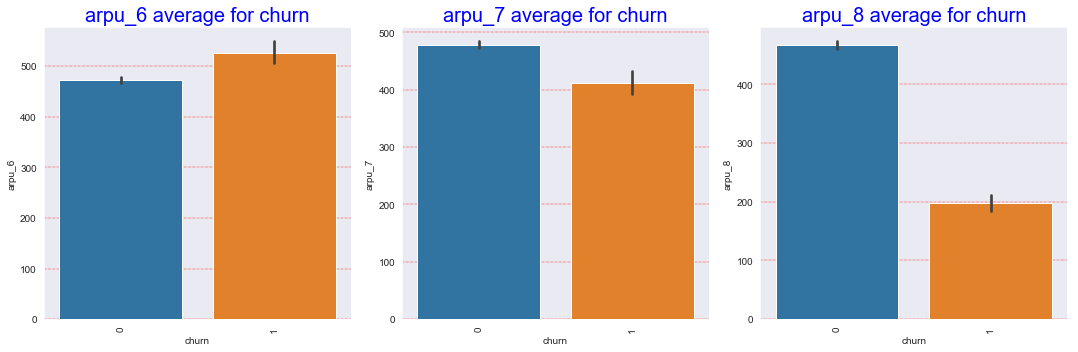

In [63]:
# Plot for Average Revenue
cols2plot = ["arpu_6","arpu_7","arpu_8"]

ln=len(cols2plot)

n=4
m=(ln//n)+1
ct=1

plt.figure(1,figsize=(20,5))

for col in cols2plot:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    sns.barplot(x="churn",y=col,data=telecom_high)
    title = col + " average for churn"
    plt.title(title,color="b",fontsize=20)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10,rotation=90)
    ct+=1
    
plt.tight_layout()
plt.show()

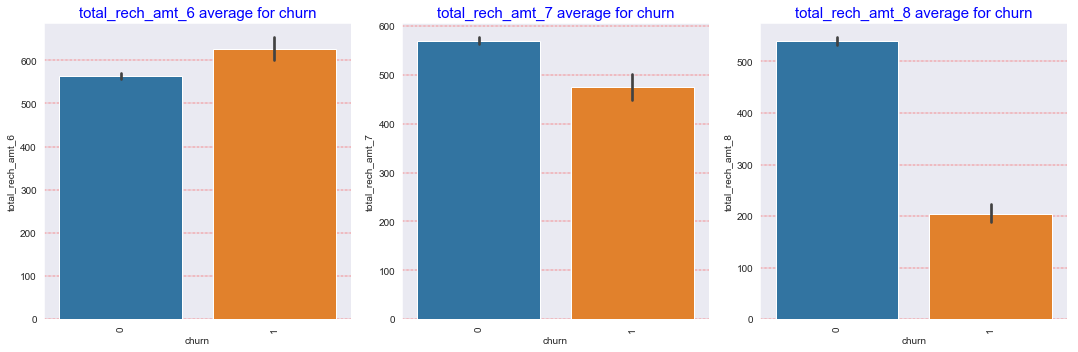

In [64]:
# Plot for total Recharge Amount
cols2plot = ["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8"]

ln=len(cols2plot)

n=4
m=(ln//n)+1
ct=1

plt.figure(1,figsize=(20,5))

for col in cols2plot:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    sns.barplot(x="churn",y=col,data=telecom_high)
    title = col + " average for churn"
    plt.title(title,color="b",fontsize=15)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10,rotation=90)
    ct+=1
    
plt.tight_layout()
plt.show()

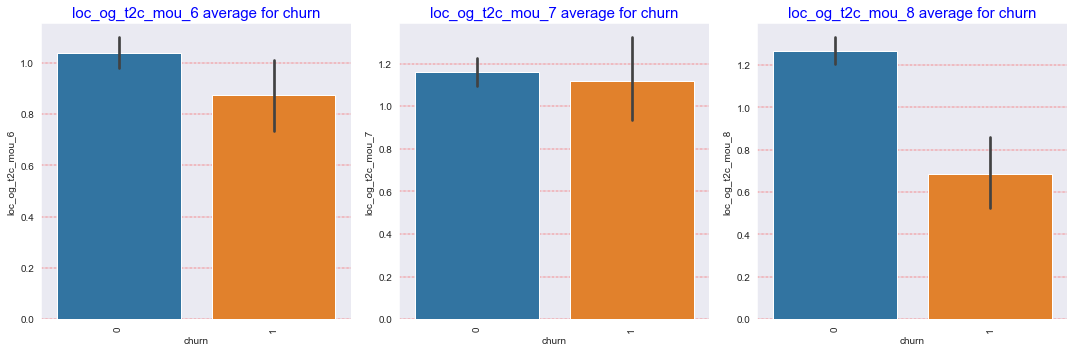

In [65]:
# Plot for Call to Call Center
cols2plot = ["loc_og_t2c_mou_6","loc_og_t2c_mou_7","loc_og_t2c_mou_8"]

ln=len(cols2plot)

n=4
m=(ln//n)+1
ct=1

plt.figure(1,figsize=(20,5))

for col in cols2plot:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    sns.barplot(x="churn",y=col,data=telecom_high)
    title = col + " average for churn"
    plt.title(title,color="b",fontsize=15)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10,rotation=90)
    ct+=1
    
plt.tight_layout()
plt.show()

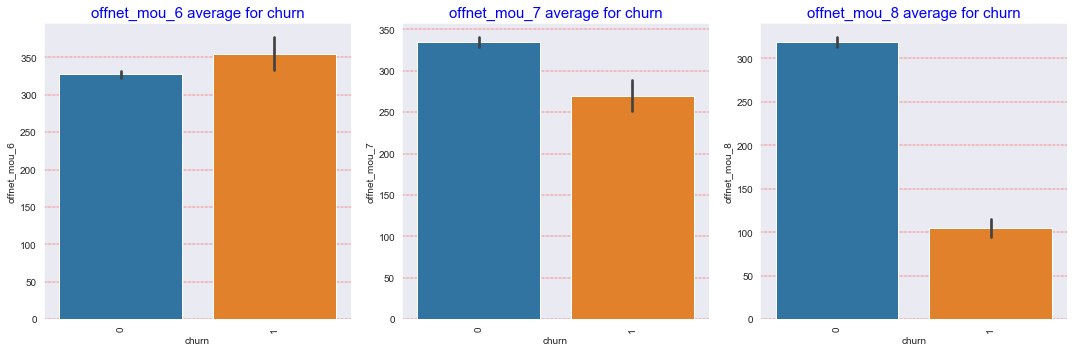

In [66]:
# Plot for Call to Other Networks
cols2plot = ["offnet_mou_6","offnet_mou_7","offnet_mou_8"]

ln=len(cols2plot)

n=4
m=(ln//n)+1
ct=1

plt.figure(1,figsize=(20,5))

for col in cols2plot:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    sns.barplot(x="churn",y=col,data=telecom_high)
    title = col + " average for churn"
    plt.title(title,color="b",fontsize=15)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10,rotation=90)
    ct+=1
    
plt.tight_layout()
plt.show()

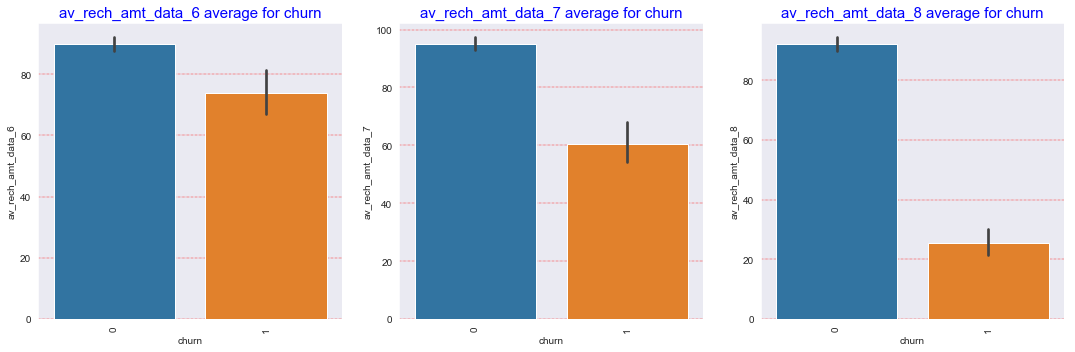

In [67]:
# Plot for Average Recharge Amount
cols2plot = ["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8"]

ln=len(cols2plot)

n=4
m=(ln//n)+1
ct=1

plt.figure(1,figsize=(20,5))

for col in cols2plot:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    sns.barplot(x="churn",y=col,data=telecom_high)
    title = col + " average for churn"
    plt.title(title,color="b",fontsize=15)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10,rotation=90)
    ct+=1
    
plt.tight_layout()
plt.show()

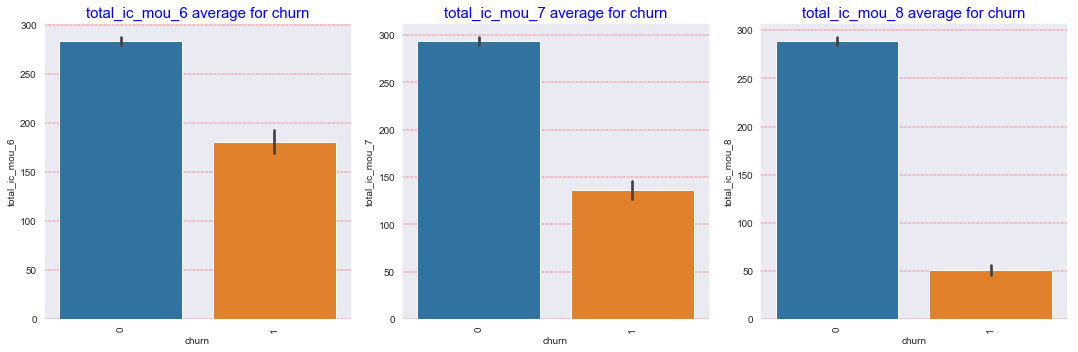

In [68]:
# Plot for Total Incoming Minutes
cols2plot = ["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"]

ln=len(cols2plot)

n=4
m=(ln//n)+1
ct=1

plt.figure(1,figsize=(20,5))

for col in cols2plot:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    sns.barplot(x="churn",y=col,data=telecom_high)
    title = col + " average for churn"
    plt.title(title,color="b",fontsize=15)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10,rotation=90)
    ct+=1
    
plt.tight_layout()
plt.show()

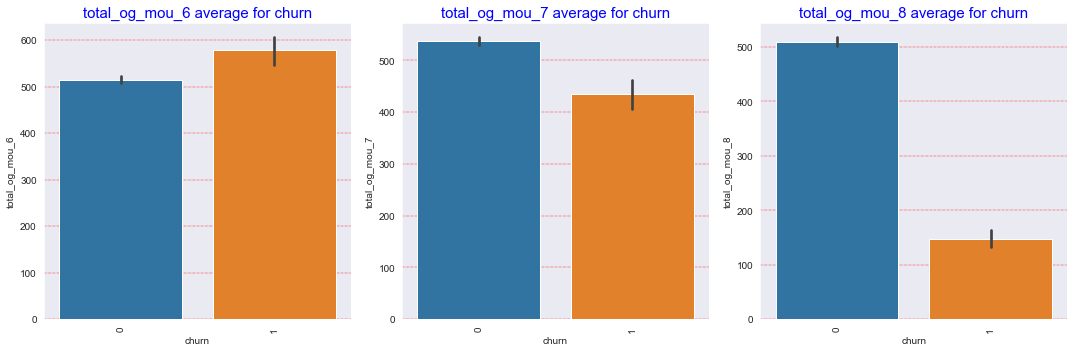

In [69]:
# Plot for Total Outgoing Minutes
cols2plot = ["total_og_mou_6","total_og_mou_7","total_og_mou_8"]

ln=len(cols2plot)

n=4
m=(ln//n)+1
ct=1

plt.figure(1,figsize=(20,5))

for col in cols2plot:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    sns.barplot(x="churn",y=col,data=telecom_high)
    title = col + " average for churn"
    plt.title(title,color="b",fontsize=15)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10,rotation=90)
    ct+=1
    
plt.tight_layout()
plt.show()

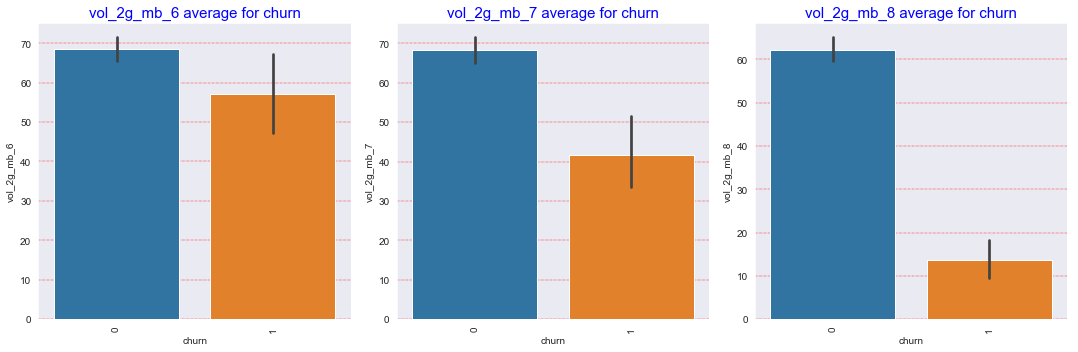

In [70]:
# Plot for 2g data volume
cols2plot = ["vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8"]

ln=len(cols2plot)

n=4
m=(ln//n)+1
ct=1

plt.figure(1,figsize=(20,5))

for col in cols2plot:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    sns.barplot(x="churn",y=col,data=telecom_high)
    title = col + " average for churn"
    plt.title(title,color="b",fontsize=15)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10,rotation=90)
    ct+=1
    
plt.tight_layout()
plt.show()

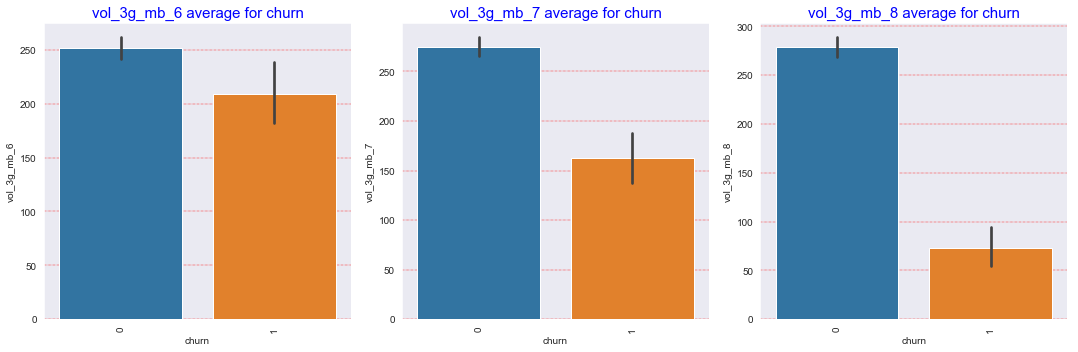

In [71]:
# Plot for 2g data volume
cols2plot = ["vol_3g_mb_6","vol_3g_mb_7","vol_3g_mb_8"]

ln=len(cols2plot)

n=4
m=(ln//n)+1
ct=1

plt.figure(1,figsize=(20,5))

for col in cols2plot:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    sns.barplot(x="churn",y=col,data=telecom_high)
    title = col + " average for churn"
    plt.title(title,color="b",fontsize=15)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10,rotation=90)
    ct+=1
    
plt.tight_layout()
plt.show()

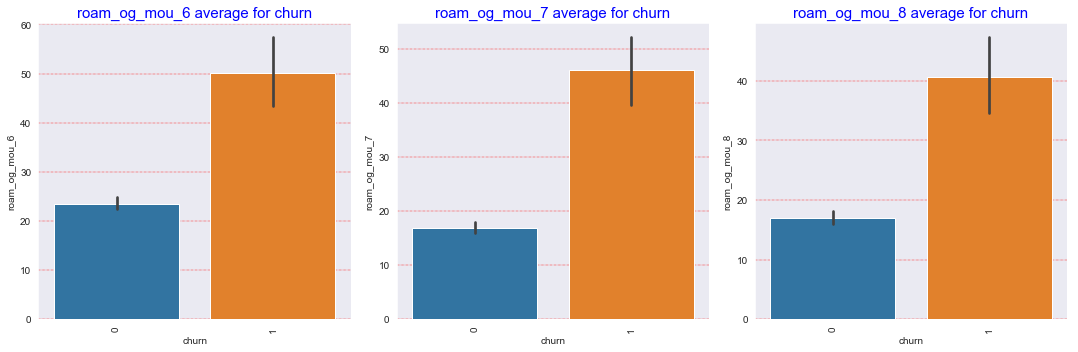

In [72]:
# Plot for Roaming Outgoing
cols2plot = ["roam_og_mou_6","roam_og_mou_7","roam_og_mou_8"]

ln=len(cols2plot)

n=4
m=(ln//n)+1
ct=1

plt.figure(1,figsize=(20,5))

for col in cols2plot:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    sns.barplot(x="churn",y=col,data=telecom_high)
    title = col + " average for churn"
    plt.title(title,color="b",fontsize=15)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10,rotation=90)
    ct+=1
    
plt.tight_layout()
plt.show()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

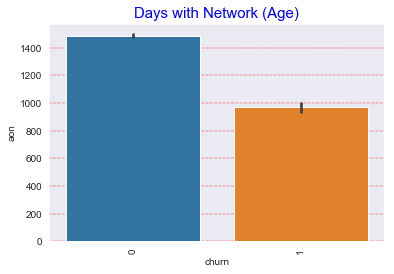

In [73]:
# Plot for Days with Network
sns.set_style("dark")
plt.grid(color='r', linestyle='-.', linewidth=0.4)
sns.barplot(x="churn",y="aon",data=telecom_high)
title = "Days with Network (Age)"
plt.title(title,color="b",fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10,rotation=90)

#### Check % of churn

In [74]:
# Calculate the churn percentage
churn = round(100*(len(telecom[telecom["churn"]==1])/len(telecom.index)),4)
hchurn = round(100*(len(telecom_high[telecom_high["churn"]==1])/len(telecom_high.index)),4)

print("Churn on all customers: ", churn)
print("Churn on high profile customers: ", hchurn)

Churn on all customers:  10.1911
Churn on high profile customers:  8.6896


#### Conclusion - <br>
This is highly imbalance data. We will use Synthetic Minority Over-sampling Technique (SMOTE) to fix the imbalance

In [75]:
# Extract numeric columns
numcols = list(telecom_high.select_dtypes(exclude="object").columns)
X_cols = [col for col in numcols if col != "churn"]
len(numcols), len(X_cols)

(157, 156)

In [76]:
# SMOTE number for k-neighbourhood
k=1

# split data into X,y
y=telecom_high["churn"]
X=telecom_high[X_cols]

smt = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=100)
X_res, y_res = smt.fit_resample(X, y)
telecom_balanced = pd.concat([pd.DataFrame(X_res,columns=X_cols), pd.DataFrame(y_res,columns=["churn"])], axis=1)
telecom_balanced.shape

C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(54684, 157)

#### Check % of churn in balanced dataset

In [77]:
bchurn = round(100*(len(telecom_balanced[telecom_balanced["churn"]==1])/len(telecom_balanced.index)),4)

print("Churn on high profile customers in balanced dataset: ", bchurn)

Churn on high profile customers in balanced dataset:  50.0


In [78]:
dataanalysis = time.time()
print("Total Time: {} second".format(dataanalysis-start))
print("Total TIme: {} minutes".format((dataanalysis-start)/60))

Total Time: 92.66776895523071 second
Total TIme: 1.5444628159205118 minutes


### Model Building

#### Split Data

In [79]:
# Create X and y
y=telecom_balanced["churn"]
X=telecom_balanced[X_cols]

# Split into trian and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Check shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38278, 156), (16406, 156), (38278,), (16406,))

In [80]:
# Check churn % in train and test
y_train.mean(), y_test.mean()

(0.5002873713360154, 0.4993295135925881)

#### Scale Data

In [81]:
#  Determine columns to scale
numcol = list(X_train.columns)
col2scale = [col for col in numcol if col != "mobile_number"]
len(numcol), len(col2scale)

(156, 155)

In [82]:
# Scale X_train
# scaler = RobustScaler()
scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train[col2scale] = scaler.fit_transform(X_train[col2scale])
X_test[col2scale] = scaler.transform(X_test[col2scale])

C:\Users\rush2\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\rush2\Anaconda3\lib\site-packages\pandas\core\frame.py:3395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\rush2\Anaconda3\lib\site-packages\pandas\core\frame.py:3367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(k

### Model Building - Using PCA

In [83]:
# PCA Sets
X_train_pca = X_train.drop("mobile_number", axis=1)
X_test_pca = X_test.drop("mobile_number", axis=1)

In [84]:
# Create PCA Object
pca = PCA(random_state=100)
pca.fit(X_train_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [85]:
# Check variancce
probsum = np.cumsum(pca.explained_variance_ratio_)
probsum

array([0.13406254, 0.23238033, 0.29321119, 0.33198876, 0.36767292,
       0.39742483, 0.42484366, 0.44916554, 0.4727173 , 0.49414659,
       0.51500042, 0.53399085, 0.5518259 , 0.5693477 , 0.58639068,
       0.60318472, 0.61851403, 0.63293769, 0.64609716, 0.65884372,
       0.67130887, 0.68250237, 0.69284898, 0.70281381, 0.71241309,
       0.72193067, 0.73132957, 0.74026936, 0.74856954, 0.75670511,
       0.76466165, 0.77242232, 0.77985981, 0.78694813, 0.79381725,
       0.80048573, 0.80694965, 0.8131994 , 0.81920247, 0.82512568,
       0.83097818, 0.83660554, 0.84218534, 0.84758176, 0.85283798,
       0.85797795, 0.86297117, 0.86779578, 0.87260039, 0.87725121,
       0.88181119, 0.88617956, 0.89025006, 0.89428356, 0.89819832,
       0.90193676, 0.90551437, 0.90900188, 0.91228196, 0.91546469,
       0.91862955, 0.92171249, 0.92462691, 0.92749382, 0.93025004,
       0.93295308, 0.93556973, 0.93814226, 0.94063037, 0.94298073,
       0.94532117, 0.94760538, 0.94980334, 0.9519093 , 0.95398

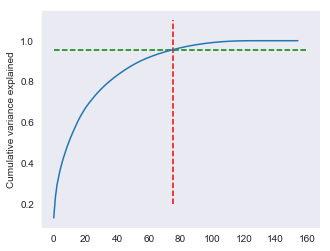

In [86]:
# plot cummulative variance
fig = plt.figure(figsize=[5,4])
# plt.vlines(x=45, ymax=1.1, ymin=0.2, colors="r", linestyles="--")
# plt.hlines(y=0.98126532, xmax=160, xmin=0, colors="g", linestyles="--")
plt.vlines(x=75, ymax=1.1, ymin=0.2, colors="r", linestyles="--")
plt.hlines(y=0.95398026, xmax=160, xmin=0, colors="g", linestyles="--")
plt.plot(probsum)
plt.ylabel("Cumulative variance explained")
plt.show()

In [87]:
# Perform PCA usign 45 components
# pcafinal = IncrementalPCA(n_components=45)
pcafinal = IncrementalPCA(n_components=75)

In [88]:
# Fit PCA
df_train_pca = pcafinal.fit_transform(X_train_pca)
df_train_pca

array([[ 3.0035748 ,  6.07964372,  5.81823438, ...,  0.44400479,
        -0.03453607, -0.86581026],
       [-3.65183408, -0.39606327,  0.6780895 , ..., -0.11418364,
        -0.06409938,  0.42330259],
       [-2.72029296, -0.13764683, -1.43298734, ..., -0.16468714,
        -0.05045877, -0.09438879],
       ...,
       [-1.84733668,  2.38398059,  1.9537411 , ...,  0.21449045,
         0.09087201, -0.03946123],
       [-0.18052534,  2.44034876, -1.59110149, ..., -0.19817493,
        -0.14852459, -0.20106906],
       [-2.77867667, -0.13553061, -1.55649887, ..., -0.14563823,
        -0.07180691, -0.10178027]])

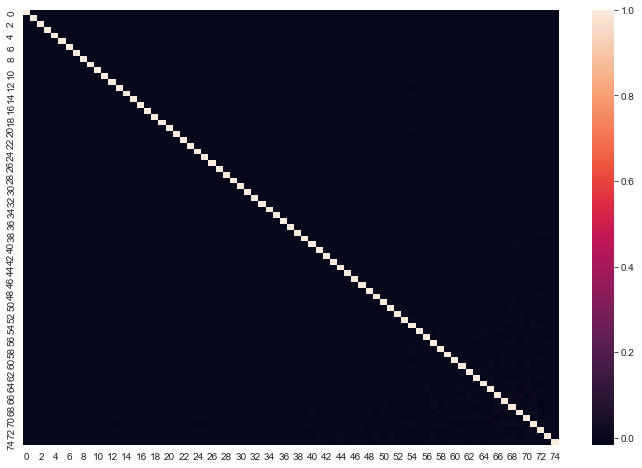

In [89]:
# Correlation Matrix
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=[12,8])
sns.heatmap(corrmat)

In [90]:
# Transform Test dataset
df_test_pca = pcafinal.transform(X_test_pca)
df_test_pca.shape

(16406, 75)

#### Logictic Regression with PCA

In [91]:
# Instantiate object
lr = LogisticRegression()

# Fit model
lrm = lr.fit(df_train_pca,y_train)

In [92]:
# Predict on test set
y_pred_prob = lrm.predict_proba(df_test_pca)

In [93]:
# # Create a dataframe to store predictiosn
telecom_pred = pd.DataFrame({"mobile_number":X_test["mobile_number"] })
telecom_pred.head()

,mobile_number
39138,7.000862e+09
19580,7.000071e+09
4833,7.001411e+09
26195,7.000843e+09
38877,7.002403e+09


In [94]:
# Add pca prob to dataframe
telecom_pred["pca_test_prob"] = y_pred_prob[:,1]
telecom_pred["churn"] = y_test
telecom_pred["mobile_number"].astype("int32")
telecom_pred.head()

,mobile_number,pca_test_prob,churn
39138,7.000862e+09,0.904957,1
19580,7.000071e+09,0.477049,0
4833,7.001411e+09,0.912420,0
26195,7.000843e+09,0.000124,0
38877,7.002403e+09,0.872053,1


In [95]:
# Check ROC score
"{:2.2}".format(metrics.roc_auc_score(y_test, telecom_pred["pca_test_prob"]))

'0.92'

In [96]:
# Final prediction on test
optimal_cutoff = 0.5
telecom_pred["pca_predicted"] = telecom_pred["pca_test_prob"].apply(lambda x:1 if x>optimal_cutoff else 0)
telecom_pred.head()

,mobile_number,pca_test_prob,churn,pca_predicted
39138,7.000862e+09,0.904957,1,1
19580,7.000071e+09,0.477049,0,0
4833,7.001411e+09,0.912420,0,1
26195,7.000843e+09,0.000124,0,0
38877,7.002403e+09,0.872053,1,1


In [97]:
# Confusion Metrics
confusion = metrics.confusion_matrix(telecom_pred["churn"], telecom_pred["pca_predicted"])
confusion

array([[6873, 1341],
       [ 936, 7256]], dtype=int64)

#### Create confusion metrics

In [98]:
# Create a temporary dataframe to store scores
temp_score = pd.DataFrame(columns=["scores","Accuracy","Sensitivity","Specificity","Precision"])
temp_score

,scores,Accuracy,Sensitivity,Specificity,Precision


In [99]:
# Create function that will return metrics and score
def confscores(conf,mdl,df_score):
    
    TP = conf[1,1] # true positive 
    TN = conf[0,0] # true negatives
    FP = conf[0,1] # false positives
    FN = conf[1,0] # false negatives
    
    sensitivity = TP/float(TP+FN)
    specificity = TN/float(TN+FP)
    precision = TP/float(TP+FP)
    accuracy = float(TP+TN)/float(TP+FP+TN+FN)
    
    df_score = df_score.append([{"scores":mdl,
                        "Accuracy":round(accuracy,4),
                        "Sensitivity":round(sensitivity,4),
                        "Specificity":round(specificity,4),
                        "Precision":round(precision,4),
                        }])
    
    
    print("Accuracy: ", round(accuracy,4))
    print("Sensitivity: ", round(sensitivity,4))
    print("Specificity: ", round(specificity,4))
    print("Precision: ", round(precision,4))
    return(df_score)

In [100]:
# Scores
temp_score = confscores(confusion,"logreg",temp_score)

Accuracy:  0.8612
Sensitivity:  0.8857
Specificity:  0.8367
Precision:  0.844


#### Find optimal cutoff value 

In [101]:
# Plot cutoff values
cutoff_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for i in cutoff_values:
    telecom_pred[i] = telecom_pred['pca_test_prob'].apply(lambda x:1 if x>i else 0)
    
telecom_pred.head()

,mobile_number,pca_test_prob,churn,pca_predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
39138,7.000862e+09,0.904957,1,1,1,1,1,1,1,1,1,1,1,0
19580,7.000071e+09,0.477049,0,0,1,1,1,1,0,0,0,0,0,0
4833,7.001411e+09,0.912420,0,1,1,1,1,1,1,1,1,1,1,0
26195,7.000843e+09,0.000124,0,0,0,0,0,0,0,0,0,0,0,0
38877,7.002403e+09,0.872053,1,1,1,1,1,1,1,1,1,1,0,0


In [102]:
# Plot accuracy, sensitivity, specificity

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in num:
    cm1 = metrics.confusion_matrix(telecom_pred['churn'], telecom_pred[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.739242  0.979370  0.499757
0.2   0.2  0.789041  0.958130  0.620404
0.3   0.3  0.822870  0.939575  0.706477
0.4   0.4  0.846885  0.919434  0.774531
0.5   0.5  0.861209  0.885742  0.836742
0.6   0.6  0.862611  0.846069  0.879109
0.7   0.7  0.852676  0.784668  0.920502
0.8   0.8  0.808729  0.665771  0.951303
0.9   0.9  0.631659  0.281250  0.981130
1.0   1.0  0.500670  0.000000  1.000000


#### Plot accuracy, sensitivity, specificity curve

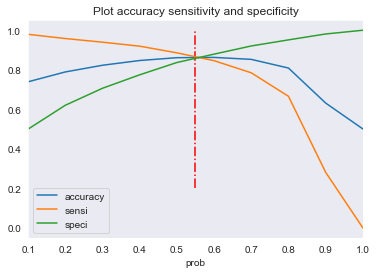

In [103]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.55, ymax=1, ymin=0.2, colors="r", linestyles="-.")
plt.title("Plot accuracy sensitivity and specificity")
plt.show()

In [104]:
# Final prediction on test
optimal_cutoff = 0.55
telecom_pred["pca_predicted_optimal"] = telecom_pred["pca_test_prob"].apply(lambda x:1 if x>optimal_cutoff else 0)
telecom_pred.head()

,mobile_number,pca_test_prob,churn,pca_predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,pca_predicted_optimal
39138,7.000862e+09,0.904957,1,1,1,1,1,1,1,1,1,1,1,0,1
19580,7.000071e+09,0.477049,0,0,1,1,1,1,0,0,0,0,0,0,0
4833,7.001411e+09,0.912420,0,1,1,1,1,1,1,1,1,1,1,0,1
26195,7.000843e+09,0.000124,0,0,0,0,0,0,0,0,0,0,0,0,0
38877,7.002403e+09,0.872053,1,1,1,1,1,1,1,1,1,1,0,0,1


In [105]:
# Confusion Metrics
confusion = metrics.confusion_matrix(telecom_pred["churn"], telecom_pred["pca_predicted_optimal"])
confusion

array([[7066, 1148],
       [1084, 7108]], dtype=int64)

In [106]:
# Scores
temp_score = confscores(confusion,"logreg_opt",temp_score)

Accuracy:  0.864
Sensitivity:  0.8677
Specificity:  0.8602
Precision:  0.8609


In [107]:
modelpca  = time.time()
print("Total Time: {} second".format(modelpca-start))
print("Total TIme: {} minutes".format((modelpca-start)/60))

Total Time: 102.15054869651794 second
Total TIme: 1.7025091449419658 minutes


#### XGBoost with PCA

In [108]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.6, 0.8], 
             'subsample': [0.6, 0.9]}   


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs=1)

In [109]:
# fit the model
model_cv.fit(df_train_pca, y_train)  

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  8.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.6, 0.8], 'subsample': [0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc

In [110]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,41.190133,0.075025,0.175567,0.014484,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.951756,0.952285,0.950786,0.951609,0.000621,3,0.973416,0.972696,0.973382,0.973165,0.000331
1,43.384471,3.610345,0.173806,0.000463,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.953371,0.954480,0.951441,0.953098,0.001256,1,0.975297,0.974959,0.976317,0.975525,0.000577
2,41.298281,0.054594,0.165425,0.000804,0.8,0.6,"{'learning_rate': 0.8, 'subsample': 0.6}",0.948603,0.952436,0.947014,0.949351,0.002276,4,0.977190,0.975923,0.975972,0.976362,0.000586
3,45.882866,0.071286,0.169787,0.008199,0.8,0.9,"{'learning_rate': 0.8, 'subsample': 0.9}",0.952449,0.953985,0.952482,0.952972,0.000716,2,0.979936,0.978825,0.979916,0.979559,0.000519


In [111]:
# Check best parameters
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [112]:
 # specify model
params = {'learning_rate': model_cv.best_params_["learning_rate"],
          'max_depth': 4, 
          'n_estimators':200,
          'subsample':model_cv.best_params_["subsample"],
         'objective':'binary:logistic'}

xgb_model = XGBClassifier(params = params)
xgb_model.fit(df_train_pca, y_train)  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 4, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [113]:
# predict using XBGBoost
y_pred_xgboost = xgb_model.predict_proba(df_test_pca)
y_pred_xgboost[:10]

array([[0.07811099, 0.921889  ],
       [0.59758365, 0.40241632],
       [0.6389044 , 0.3610956 ],
       [0.9523108 , 0.04768922],
       [0.14721745, 0.85278255],
       [0.8745015 , 0.12549847],
       [0.82108665, 0.17891338],
       [0.1067332 , 0.8932668 ],
       [0.27451187, 0.7254881 ],
       [0.3786322 , 0.6213678 ]], dtype=float32)

In [114]:
# roc_auc
auc = sklearn.metrics.roc_auc_score(y_test, y_pred_xgboost[:, 1])
auc

0.942759396590425

In [115]:
# Add XGB prob to dataframe
telecom_pred["xgb_test_prob"] = y_pred_xgboost[:,1]

In [116]:
# Plot cutoff values
cutoff_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for i in cutoff_values:
    col = "xgb_"+str(i)
    telecom_pred[col] = telecom_pred["xgb_test_prob"].apply(lambda x:1 if x>i else 0)
    
telecom_pred.head()

,mobile_number,pca_test_prob,churn,pca_predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,pca_predicted_optimal,xgb_test_prob,xgb_0.1,xgb_0.2,xgb_0.3,xgb_0.4,xgb_0.5,xgb_0.6,xgb_0.7,xgb_0.8,xgb_0.9,xgb_1.0
39138,7.000862e+09,0.904957,1,1,1,1,1,1,1,1,1,1,1,0,1,0.921889,1,1,1,1,1,1,1,1,1,0
19580,7.000071e+09,0.477049,0,0,1,1,1,1,0,0,0,0,0,0,0,0.402416,1,1,1,1,0,0,0,0,0,0
4833,7.001411e+09,0.912420,0,1,1,1,1,1,1,1,1,1,1,0,1,0.361096,1,1,1,0,0,0,0,0,0,0
26195,7.000843e+09,0.000124,0,0,0,0,0,0,0,0,0,0,0,0,0,0.047689,0,0,0,0,0,0,0,0,0,0
38877,7.002403e+09,0.872053,1,1,1,1,1,1,1,1,1,1,0,0,1,0.852783,1,1,1,1,1,1,1,1,0,0


In [117]:
# Plot accuracy, sensitivity, specificity

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df_xgb = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in num:
    col = "xgb_"+str(i)
    cm1 = metrics.confusion_matrix(telecom_pred['churn'], telecom_pred[col])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df_xgb.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df_xgb)

     prob  accuracy     sensi     speci
0.1   0.1  0.716628  0.992432  0.441563
0.2   0.2  0.812386  0.974609  0.650597
0.3   0.3  0.850603  0.946289  0.755174
0.4   0.4  0.868950  0.915405  0.822620
0.5   0.5  0.874436  0.879395  0.869491
0.6   0.6  0.867609  0.834229  0.900901
0.7   0.7  0.854200  0.777832  0.930363
0.8   0.8  0.816591  0.675903  0.956903
0.9   0.9  0.683774  0.378540  0.988191
1.0   1.0  0.500670  0.000000  1.000000


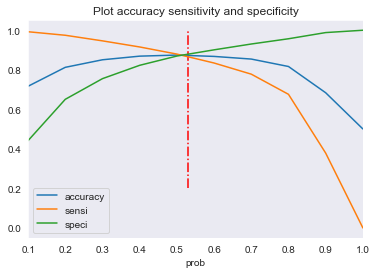

In [118]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df_xgb.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.53, ymax=1, ymin=0.2, colors="r", linestyles="-.")
plt.title("Plot accuracy sensitivity and specificity")
plt.show()

In [119]:
# Final prediction on test
optimal_cutoff = 0.53
telecom_pred["xgb_predicted_optimal"] = telecom_pred["xgb_test_prob"].apply(lambda x:1 if x>optimal_cutoff else 0)
telecom_pred.head()

,mobile_number,pca_test_prob,churn,pca_predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,pca_predicted_optimal,xgb_test_prob,xgb_0.1,xgb_0.2,xgb_0.3,xgb_0.4,xgb_0.5,xgb_0.6,xgb_0.7,xgb_0.8,xgb_0.9,xgb_1.0,xgb_predicted_optimal
39138,7.000862e+09,0.904957,1,1,1,1,1,1,1,1,1,1,1,0,1,0.921889,1,1,1,1,1,1,1,1,1,0,1
19580,7.000071e+09,0.477049,0,0,1,1,1,1,0,0,0,0,0,0,0,0.402416,1,1,1,1,0,0,0,0,0,0,0
4833,7.001411e+09,0.912420,0,1,1,1,1,1,1,1,1,1,1,0,1,0.361096,1,1,1,0,0,0,0,0,0,0,0
26195,7.000843e+09,0.000124,0,0,0,0,0,0,0,0,0,0,0,0,0,0.047689,0,0,0,0,0,0,0,0,0,0,0
38877,7.002403e+09,0.872053,1,1,1,1,1,1,1,1,1,1,0,0,1,0.852783,1,1,1,1,1,1,1,1,0,0,1


In [120]:
# Confusion Metrics
confusion_xgb = metrics.confusion_matrix(telecom_pred["churn"], telecom_pred["xgb_predicted_optimal"])
confusion_xgb

array([[7226,  988],
       [1101, 7091]], dtype=int64)

In [121]:
# Scores
temp_score = confscores(confusion_xgb,"xgb",temp_score)

Accuracy:  0.8727
Sensitivity:  0.8656
Specificity:  0.8797
Precision:  0.8777


In [122]:
modelxgb  = time.time()
print("Total Time: {} second".format(modelxgb-start))
print("Total TIme: {} minutes".format((modelxgb-start)/60))

Total Time: 749.7251398563385 second
Total TIme: 12.495418997605642 minutes


#### SVM with PCA

In [123]:
# specify model
svc = SVC(kernel="rbf",C=200,probability=True,random_state=100) 
# svc = SVC(kernel="rbf",C=300,probability=True,random_state=100) 
svc.fit(df_train_pca, y_train)  

SVC(C=200, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=100, shrinking=True, tol=0.001,
    verbose=False)

In [124]:
# predict using XBGBoost
y_pred_svc = svc.predict_proba(df_test_pca)
y_pred_svc[:10]

array([[6.73767890e-03, 9.93262321e-01],
       [9.97346246e-01, 2.65375444e-03],
       [9.99962487e-01, 3.75132166e-05],
       [9.99373587e-01, 6.26413230e-04],
       [1.55519208e-02, 9.84448079e-01],
       [5.26070679e-01, 4.73929321e-01],
       [1.85750209e-01, 8.14249791e-01],
       [9.23140346e-02, 9.07685965e-01],
       [3.02216939e-08, 9.99999970e-01],
       [1.07405492e-02, 9.89259451e-01]])

In [125]:
# roc_auc
auc = sklearn.metrics.roc_auc_score(y_test, y_pred_svc[:, 1])
auc

0.9809673300966719

In [126]:
# Add SVC prob to dataframe
telecom_pred["svc_test_prob"] = y_pred_svc[:,1]

In [127]:
# Plot cutoff values
cutoff_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for i in cutoff_values:
    col = "svc_"+str(i)
    telecom_pred[col] = telecom_pred["svc_test_prob"].apply(lambda x:1 if x>i else 0)
    
telecom_pred.head()

,mobile_number,pca_test_prob,churn,pca_predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,pca_predicted_optimal,xgb_test_prob,xgb_0.1,xgb_0.2,xgb_0.3,xgb_0.4,xgb_0.5,xgb_0.6,xgb_0.7,xgb_0.8,xgb_0.9,xgb_1.0,xgb_predicted_optimal,svc_test_prob,svc_0.1,svc_0.2,svc_0.3,svc_0.4,svc_0.5,svc_0.6,svc_0.7,svc_0.8,svc_0.9,svc_1.0
39138,7.000862e+09,0.904957,1,1,1,1,1,1,1,1,1,1,1,0,1,0.921889,1,1,1,1,1,1,1,1,1,0,1,0.993262,1,1,1,1,1,1,1,1,1,0
19580,7.000071e+09,0.477049,0,0,1,1,1,1,0,0,0,0,0,0,0,0.402416,1,1,1,1,0,0,0,0,0,0,0,0.002654,0,0,0,0,0,0,0,0,0,0
4833,7.001411e+09,0.912420,0,1,1,1,1,1,1,1,1,1,1,0,1,0.361096,1,1,1,0,0,0,0,0,0,0,0,0.000038,0,0,0,0,0,0,0,0,0,0
26195,7.000843e+09,0.000124,0,0,0,0,0,0,0,0,0,0,0,0,0,0.047689,0,0,0,0,0,0,0,0,0,0,0,0.000626,0,0,0,0,0,0,0,0,0,0
38877,7.002403e+09,0.872053,1,1,1,1,1,1,1,1,1,1,0,0,1,0.852783,1,1,1,1,1,1,1,1,0,0,1,0.984448,1,1,1,1,1,1,1,1,1,0


In [128]:
# Plot accuracy, sensitivity, specificity

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df_svc = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in num:
    col = "svc_"+str(i)
    cm1 = metrics.confusion_matrix(telecom_pred['churn'], telecom_pred[col])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df_svc.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df_svc)

     prob  accuracy     sensi     speci
0.1   0.1  0.923382  0.994019  0.852934
0.2   0.2  0.940144  0.991089  0.889335
0.3   0.3  0.948068  0.987183  0.909058
0.4   0.4  0.953736  0.982788  0.924763
0.5   0.5  0.957089  0.978271  0.935963
0.6   0.6  0.958552  0.970947  0.946189
0.7   0.7  0.956784  0.957153  0.956416
0.8   0.8  0.946788  0.927368  0.966155
0.9   0.9  0.839876  0.702637  0.976747
1.0   1.0  0.500670  0.000000  1.000000


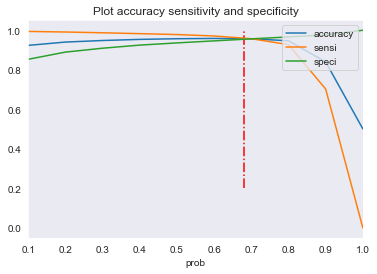

In [129]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df_svc.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.68, ymax=1, ymin=0.2, colors="r", linestyles="-.")
plt.title("Plot accuracy sensitivity and specificity")
plt.legend(loc='upper right')
plt.show()

In [130]:
# Final prediction on test
# optimal_cutoff = 0.56
optimal_cutoff = 0.68
telecom_pred["svc_predicted_optimal"] = telecom_pred["svc_test_prob"].apply(lambda x:1 if x>optimal_cutoff else 0)
telecom_pred.head()

,mobile_number,pca_test_prob,churn,pca_predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,pca_predicted_optimal,xgb_test_prob,xgb_0.1,xgb_0.2,xgb_0.3,xgb_0.4,xgb_0.5,xgb_0.6,xgb_0.7,xgb_0.8,xgb_0.9,xgb_1.0,xgb_predicted_optimal,svc_test_prob,svc_0.1,svc_0.2,svc_0.3,svc_0.4,svc_0.5,svc_0.6,svc_0.7,svc_0.8,svc_0.9,svc_1.0,svc_predicted_optimal
39138,7.000862e+09,0.904957,1,1,1,1,1,1,1,1,1,1,1,0,1,0.921889,1,1,1,1,1,1,1,1,1,0,1,0.993262,1,1,1,1,1,1,1,1,1,0,1
19580,7.000071e+09,0.477049,0,0,1,1,1,1,0,0,0,0,0,0,0,0.402416,1,1,1,1,0,0,0,0,0,0,0,0.002654,0,0,0,0,0,0,0,0,0,0,0
4833,7.001411e+09,0.912420,0,1,1,1,1,1,1,1,1,1,1,0,1,0.361096,1,1,1,0,0,0,0,0,0,0,0,0.000038,0,0,0,0,0,0,0,0,0,0,0
26195,7.000843e+09,0.000124,0,0,0,0,0,0,0,0,0,0,0,0,0,0.047689,0,0,0,0,0,0,0,0,0,0,0,0.000626,0,0,0,0,0,0,0,0,0,0,0
38877,7.002403e+09,0.872053,1,1,1,1,1,1,1,1,1,1,0,0,1,0.852783,1,1,1,1,1,1,1,1,0,0,1,0.984448,1,1,1,1,1,1,1,1,1,0,1


In [131]:
# Confusion Metrics
confusion_svc = metrics.confusion_matrix(telecom_pred["churn"], telecom_pred["svc_predicted_optimal"])
confusion_svc

array([[7835,  379],
       [ 319, 7873]], dtype=int64)

In [132]:
# Scores
temp_score = confscores(confusion_svc,"svc",temp_score)

Accuracy:  0.9575
Sensitivity:  0.9611
Specificity:  0.9539
Precision:  0.9541


Accuracy:  0.9296
Sensitivity:  0.9296
Specificity:  0.9296
Precision:  0.9295

In [133]:
modelsvm  = time.time()
print("Total Time: {} second".format(modelsvm-start))
print("Total TIme: {} minutes".format((modelsvm-start)/60))

Total Time: 3538.5626966953278 second
Total TIme: 58.97604494492213 minutes


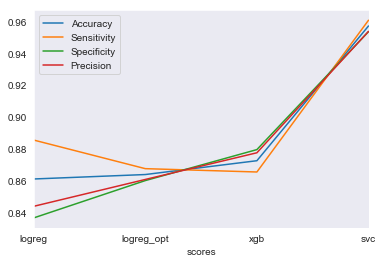

In [134]:
# Plot scores
temp_score.set_index("scores").plot()

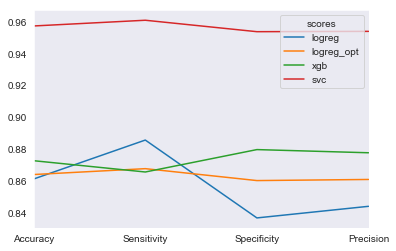

In [135]:
# Plot for scores
temp_score.set_index("scores").T.plot()

#### Conclusion -
1. SVM gives the best result. We will use SVM for prediction
2. We will use sensitivity as evaluation metrics

###  Model Building - Variable Importance

In [136]:
# Drop mobile numbers
X_train_model = X_train.drop("mobile_number",axis=1)
X_test_model = X_test.drop("mobile_number",axis=1)

In [137]:
# Check shape of dataframe
X_train_model.shape, X_train.shape, X_test_model.shape, X_test.shape

((38278, 155), (38278, 156), (16406, 155), (16406, 156))

#### Perform RFE to identify top 25 variables

In [138]:
# Instantiate object
logreg = LogisticRegression()
rfe = RFE(logreg,25)
rfe = rfe.fit(X_train_model, y_train)

C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [139]:
# List of columns selected by RFE
initrfecols = list(X_train_model.columns[rfe.support_])
initrfecols

['arpu_6',
 'arpu_7',
 'offnet_mou_8',
 'roam_ic_mou_7',
 'roam_og_mou_8',
 'std_og_t2m_mou_8',
 'og_others_7',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_8',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'max_rech_data_6',
 'av_rech_amt_data_6',
 'arpu_3g_7',
 'arpu_2g_6',
 'arpu_2g_7',
 'monthly_2g_8',
 'fb_user_8',
 'aon']

#### Create a function for model building

In [140]:
# This functions return the model statistics and VIF for the independent variables.
def createmodel(df):

    # Assign X_train
    X_train = df
    
    # Add constant
    X_train_sm = sm.add_constant(X_train)

    # Create object
    logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

    # Fit model
    res = logm.fit()

    # Summary
    print(res.summary())
    print(" "*80)
    
    # VIF calculation
    vif = pd.DataFrame()
    vif["Feature"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif["VIF"] = round(vif["VIF"],2)
    print(""*80)
    print(" "*10,"VIF Details"," "*10)
    print("="*80)
    print(vif)
    return X_train_sm,res

####  Model 1

In [141]:
# Building model with features given by RFE
selected_features = ['arpu_6','arpu_7','offnet_mou_8','roam_og_mou_7','roam_og_mou_8',
 'loc_og_t2m_mou_8','loc_og_mou_8','std_og_t2f_mou_8','std_og_mou_7',
 'std_og_mou_8','total_og_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8','loc_ic_mou_8','std_ic_mou_8','total_ic_mou_8',
 'spl_ic_mou_8','total_rech_num_8','total_rech_amt_6','max_rech_amt_8',
 'last_day_rch_amt_8','total_rech_data_8','monthly_2g_8','monthly_3g_8']

X_train_sm,res1 = createmodel(X_train_model[selected_features])

C:\Users\rush2\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38278
Model:                            GLM   Df Residuals:                    38252
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13909.
Date:                Fri, 24 Jan 2020   Deviance:                       27819.
Time:                        22:54:03   Pearson chi2:                 2.42e+13
No. Iterations:                     7   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4812      0.020    -24.548      0.000      -0.520      -0.443
arpu_6                 0.313

#### Model 2

In [142]:
# Building model with features given by RFE
selected_features = ['arpu_6','offnet_mou_8','roam_og_mou_7','roam_og_mou_8',
 'loc_og_t2m_mou_8','loc_og_mou_8','std_og_t2f_mou_8','std_og_mou_7',
 'std_og_mou_8','loc_ic_mou_8','std_ic_mou_8',
 'spl_ic_mou_8','total_rech_num_8','max_rech_amt_8',
 'last_day_rch_amt_8','total_rech_data_8','monthly_2g_8','monthly_3g_8']

X_train_sm,res1 = createmodel(X_train_model[selected_features])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38278
Model:                            GLM   Df Residuals:                    38259
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14765.
Date:                Fri, 24 Jan 2020   Deviance:                       29530.
Time:                        22:54:08   Pearson chi2:                 2.67e+14
No. Iterations:                     7   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6605      0.020    -32.563      0.000      -0.700      -0.621
arpu_6                 0.453

In [143]:
# Prediction based on latest model
X_test_sm = sm.add_constant(X_test_model[selected_features])

# predict using logreg
y_pred_sm = res1.predict(X_test_sm)
y_pred_sm[:10]

39138    0.904358
19580    0.347000
4833     0.661656
26195    0.000306
38877    0.908941
4838     0.290073
27624    0.056632
32986    0.887339
50465    0.852663
54523    0.533285
dtype: float64

In [144]:
# roc_auc
auc = sklearn.metrics.roc_auc_score(y_test, y_pred_sm.values)
auc

0.9198375225415448

In [145]:
# Add ABC prob to dataframe
telecom_pred["sm_test_prob"] = y_pred_sm.values

In [146]:
# Plot cutoff values
cutoff_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for i in cutoff_values:
    col = "sm_"+str(i)
    telecom_pred[col] = telecom_pred["sm_test_prob"].apply(lambda x:1 if x>i else 0)
    
telecom_pred.head()

,mobile_number,pca_test_prob,churn,pca_predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,pca_predicted_optimal,xgb_test_prob,xgb_0.1,xgb_0.2,xgb_0.3,xgb_0.4,xgb_0.5,xgb_0.6,xgb_0.7,xgb_0.8,xgb_0.9,xgb_1.0,xgb_predicted_optimal,svc_test_prob,svc_0.1,svc_0.2,svc_0.3,svc_0.4,svc_0.5,svc_0.6,svc_0.7,svc_0.8,svc_0.9,svc_1.0,svc_predicted_optimal,sm_test_prob,sm_0.1,sm_0.2,sm_0.3,sm_0.4,sm_0.5,sm_0.6,sm_0.7,sm_0.8,sm_0.9,sm_1.0
39138,7.000862e+09,0.904957,1,1,1,1,1,1,1,1,1,1,1,0,1,0.921889,1,1,1,1,1,1,1,1,1,0,1,0.993262,1,1,1,1,1,1,1,1,1,0,1,0.904358,1,1,1,1,1,1,1,1,1,0
19580,7.000071e+09,0.477049,0,0,1,1,1,1,0,0,0,0,0,0,0,0.402416,1,1,1,1,0,0,0,0,0,0,0,0.002654,0,0,0,0,0,0,0,0,0,0,0,0.347000,1,1,1,0,0,0,0,0,0,0
4833,7.001411e+09,0.912420,0,1,1,1,1,1,1,1,1,1,1,0,1,0.361096,1,1,1,0,0,0,0,0,0,0,0,0.000038,0,0,0,0,0,0,0,0,0,0,0,0.661656,1,1,1,1,1,1,0,0,0,0
26195,7.000843e+09,0.000124,0,0,0,0,0,0,0,0,0,0,0,0,0,0.047689,0,0,0,0,0,0,0,0,0,0,0,0.000626,0,0,0,0,0,0,0,0,0,0,0,0.000306,0,0,0,0,0,0,0,0,0,0
38877,7.002403e+09,0.872053,1,1,1,1,1,1,1,1,1,1,0,0,1,0.852783,1,1,1,1,1,1,1,1,0,0,1,0.984448,1,1,1,1,1,1,1,1,1,0,1,0.908941,1,1,1,1,1,1,1,1,1,0


In [147]:
# Plot accuracy, sensitivity, specificity

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df_sm = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in num:
    col = "sm_"+str(i)
    cm1 = metrics.confusion_matrix(telecom_pred['churn'], telecom_pred[col])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df_sm.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df_sm)

     prob  accuracy     sensi     speci
0.1   0.1  0.723516  0.973022  0.474677
0.2   0.2  0.773924  0.955933  0.592403
0.3   0.3  0.812264  0.938110  0.686754
0.4   0.4  0.836036  0.910645  0.761626
0.5   0.5  0.851762  0.881592  0.822011
0.6   0.6  0.858223  0.844360  0.872048
0.7   0.7  0.849384  0.783325  0.915267
0.8   0.8  0.812386  0.671265  0.953129
0.9   0.9  0.590577  0.193848  0.986243
1.0   1.0  0.500670  0.000000  1.000000


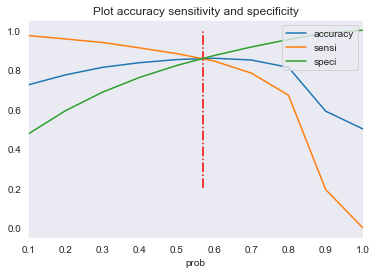

In [148]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df_sm.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.57, ymax=1, ymin=0.2, colors="r", linestyles="-.")
plt.title("Plot accuracy sensitivity and specificity")
plt.legend(loc='upper right')
plt.show()

In [149]:
# Final prediction on test
optimal_cutoff = 0.57
telecom_pred["sm_predicted_optimal"] = telecom_pred["sm_test_prob"].apply(lambda x:1 if x>optimal_cutoff else 0)
telecom_pred.head()

,mobile_number,pca_test_prob,churn,pca_predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,pca_predicted_optimal,xgb_test_prob,xgb_0.1,xgb_0.2,xgb_0.3,xgb_0.4,xgb_0.5,xgb_0.6,xgb_0.7,xgb_0.8,xgb_0.9,xgb_1.0,xgb_predicted_optimal,svc_test_prob,svc_0.1,svc_0.2,svc_0.3,svc_0.4,svc_0.5,svc_0.6,svc_0.7,svc_0.8,svc_0.9,svc_1.0,svc_predicted_optimal,sm_test_prob,sm_0.1,sm_0.2,sm_0.3,sm_0.4,sm_0.5,sm_0.6,sm_0.7,sm_0.8,sm_0.9,sm_1.0,sm_predicted_optimal
39138,7.000862e+09,0.904957,1,1,1,1,1,1,1,1,1,1,1,0,1,0.921889,1,1,1,1,1,1,1,1,1,0,1,0.993262,1,1,1,1,1,1,1,1,1,0,1,0.904358,1,1,1,1,1,1,1,1,1,0,1
19580,7.000071e+09,0.477049,0,0,1,1,1,1,0,0,0,0,0,0,0,0.402416,1,1,1,1,0,0,0,0,0,0,0,0.002654,0,0,0,0,0,0,0,0,0,0,0,0.347000,1,1,1,0,0,0,0,0,0,0,0
4833,7.001411e+09,0.912420,0,1,1,1,1,1,1,1,1,1,1,0,1,0.361096,1,1,1,0,0,0,0,0,0,0,0,0.000038,0,0,0,0,0,0,0,0,0,0,0,0.661656,1,1,1,1,1,1,0,0,0,0,1
26195,7.000843e+09,0.000124,0,0,0,0,0,0,0,0,0,0,0,0,0,0.047689,0,0,0,0,0,0,0,0,0,0,0,0.000626,0,0,0,0,0,0,0,0,0,0,0,0.000306,0,0,0,0,0,0,0,0,0,0,0
38877,7.002403e+09,0.872053,1,1,1,1,1,1,1,1,1,1,0,0,1,0.852783,1,1,1,1,1,1,1,1,0,0,1,0.984448,1,1,1,1,1,1,1,1,1,0,1,0.908941,1,1,1,1,1,1,1,1,1,0,1


In [150]:
# Confusion Metrics
confusion_sm = metrics.confusion_matrix(telecom_pred["churn"], telecom_pred["sm_predicted_optimal"])
confusion_sm

array([[7039, 1175],
       [1169, 7023]], dtype=int64)

In [151]:
# Scores
temp_score = confscores(confusion_sm,"sm",temp_score)

Accuracy:  0.8571
Sensitivity:  0.8573
Specificity:  0.857
Precision:  0.8567


In [152]:
modelsm  = time.time()
print("Total Time: {} second".format(modelsm-start))
print("Total TIme: {} minutes".format((modelsm-start)/60))

Total Time: 3712.7031252384186 second
Total TIme: 61.878385420640306 minutes


### Using Random Forest

In [153]:
# Create the parameter grid based on the results of random search 

param_grid = {
    'min_samples_leaf': range(20, 60, 20),
    'min_samples_split': range(20, 60, 20),
    'n_estimators': [150,350]
}


# Create a based model
rf = RandomForestClassifier(max_depth=10, max_features=10)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [154]:
# Fit the grid search to the data
grid_search.fit(X_train_model[selected_features], y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  7.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features=10,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_stat

In [155]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.921573705466414 using {'min_samples_leaf': 20, 'min_samples_split': 40, 'n_estimators': 150}


In [156]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True,max_depth=10, max_features=10,
                             min_samples_leaf=grid_search.best_params_["min_samples_leaf"], 
                             min_samples_split=grid_search.best_params_["min_samples_split"],
                             n_estimators=grid_search.best_params_["n_estimators"])



# fit
rfc.fit(X_train_model[selected_features],y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
# predict using logreg
y_pred_rf = rfc.predict(X_test_model[selected_features])
y_pred_rf[:10]

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [158]:
# Predict
telecom_pred["rf_predicted_optimal"] = y_pred_rf

In [159]:
# Confusion Metrics
confusion_rf = metrics.confusion_matrix(telecom_pred["churn"], telecom_pred["rf_predicted_optimal"])
confusion_rf

array([[7589,  625],
       [ 578, 7614]], dtype=int64)

In [160]:
# Scores
temp_score = confscores(confusion_rf,"rf",temp_score)

Accuracy:  0.9267
Sensitivity:  0.9294
Specificity:  0.9239
Precision:  0.9241


rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=14,
                             min_samples_leaf=20, 
                             min_samples_split=40,
                             max_features=12,
                             n_estimators=350)
Accuracy:  0.9326
Sensitivity:  0.9346
Specificity:  0.9307
Precision:  0.9308

#### Determining informant variables

In [161]:
# Calculate variable importance and sort by importance
feature_importances = pd.DataFrame(rfc.feature_importances_,index = X_test_model[selected_features].columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
loc_ic_mou_8,0.297597
max_rech_amt_8,0.273933
roam_og_mou_8,0.109270
loc_og_mou_8,0.085862
total_rech_data_8,0.050291
last_day_rch_amt_8,0.044552
loc_og_t2m_mou_8,0.029973
roam_og_mou_7,0.022175
total_rech_num_8,0.021915
std_og_mou_8,0.012338


### Decision Tree

In [1]:
# Create the parameter grid 
param_grid = {
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50)
}

n_folds = 3

# Instantiate the grid search model
dtree = DecisionTreeClassifier(max_depth=10, criterion="entropy")


tree_grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs=-1)


# Fit the grid search to the data
tree_grid_search.fit(X_train_model[selected_features], y_train)


NameError: name 'DecisionTreeClassifier' is not defined

In [163]:
# cv results
cv_results = pd.DataFrame(tree_grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.940501,0.020646,0.018177,0.006281,50,50,"{'min_samples_leaf': 50, 'min_samples_split': 50}",0.905564,0.904773,0.903206,0.904514,0.000980,1
1,0.957058,0.017404,0.014129,0.005598,50,100,"{'min_samples_leaf': 50, 'min_samples_split': ...",0.905564,0.904773,0.903206,0.904514,0.000980,1
2,0.898218,0.035902,0.010825,0.000843,100,50,"{'min_samples_leaf': 100, 'min_samples_split':...",0.893966,0.899052,0.891998,0.895005,0.002972,3
3,0.876615,0.037735,0.008362,0.007966,100,100,"{'min_samples_leaf': 100, 'min_samples_split':...",0.893966,0.899052,0.891998,0.895005,0.002972,3


In [164]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", tree_grid_search.best_score_)
print(tree_grid_search.best_estimator_)

best accuracy 0.904514315012584
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [165]:
tree_grid_search.best_params_

{'min_samples_leaf': 50, 'min_samples_split': 50}

In [166]:
# model with optimal hyperparameters
tree_model = DecisionTreeClassifier(max_depth=10, criterion="entropy",random_state = 100,
                                  min_samples_leaf=tree_grid_search.best_params_["min_samples_leaf"],
                                  min_samples_split=tree_grid_search.best_params_["min_samples_split"])


tree_model.fit(X_train_model[selected_features], y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [167]:
# accuracy score
tree_model.score(X_test_model[selected_features],y_test)

0.9126539071071559

In [168]:
# predict using logreg
y_pred_dt = tree_model.predict(X_test_model[selected_features])
y_pred_dt[:10]

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [169]:
# Predict
telecom_pred["dt_predicted_optimal"] = y_pred_dt

In [170]:
# Confusion Metrics
confusion_dt = metrics.confusion_matrix(telecom_pred["churn"], telecom_pred["dt_predicted_optimal"])
confusion_dt

array([[7540,  674],
       [ 759, 7433]], dtype=int64)

In [171]:
# Scores
temp_score = confscores(confusion_dt,"dt",temp_score)

Accuracy:  0.9127
Sensitivity:  0.9073
Specificity:  0.9179
Precision:  0.9169


In [172]:
# Calculate variable importance and sort by importance
feature_importances_dt = pd.DataFrame(tree_model.feature_importances_,index = X_test_model[selected_features].columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_dt

,importance
loc_ic_mou_8,0.472074
max_rech_amt_8,0.159293
roam_og_mou_8,0.138154
total_rech_data_8,0.058431
total_rech_num_8,0.048643
last_day_rch_amt_8,0.046216
std_og_mou_7,0.015485
arpu_6,0.012033
roam_og_mou_7,0.011338
offnet_mou_8,0.010161


In [173]:
dttime = time.time()
print("Total Time: {} second".format(dttime-start))
print("Total TIme: {} minutes".format((dttime-start)/60))

Total Time: 4270.444361448288 second
Total TIme: 71.1740726908048 minutes


<Figure size 720x720 with 0 Axes>

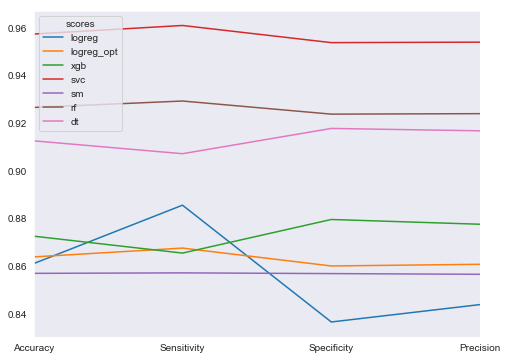

In [174]:
# Plot for scores
plt.figure(2,figsize=(10,10))
temp_score.set_index("scores").T.plot(figsize=(8,6))

In [175]:
end = time.time()
print("Total Time: {} second".format(end-start))
print("Total TIme: {} minutes".format((end-start)/60))

Total Time: 4271.039603948593 second
Total TIme: 71.18399339914322 minutes


In [176]:
temp_score

,scores,Accuracy,Sensitivity,Specificity,Precision
0,logreg,0.8612,0.8857,0.8367,0.8440
0,logreg_opt,0.8640,0.8677,0.8602,0.8609
0,xgb,0.8727,0.8656,0.8797,0.8777
0,svc,0.9575,0.9611,0.9539,0.9541
0,sm,0.8571,0.8573,0.8570,0.8567
0,rf,0.9267,0.9294,0.9239,0.9241
0,dt,0.9127,0.9073,0.9179,0.9169
